In [1]:
# pip install nbformat
# pip install plotly
# pip install pandas
# pip install numpy
# pip install matplotlib
# pip install seaborn
# pip install sklearn
# pip install yellowbrick
# pip install scipy
# pip install pgmpy
# pip install ipywidgets

## Restart kernel after install all packages

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import LabelEncoder,StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

# Load data

In [3]:
data = pd.read_csv("03. [DAZONE2024] DATASET.csv")
data

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Promo_20,Complain,Gender,Phone,Phone_Number,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method
0,6815,1982.0,PhD,30396.0,30-04-2023,22.0,16.0,2.0,6.0,0.0,...,0.0,0.0,Male,NaN,8.416733e+10,2023.0,4.0,6.0,Married_1,Cash
1,2567,NaN,NaN,83532.0,26-09-2022,36.0,756.0,NaN,562.0,NaN,...,0.0,0.0,Other,8.431989e+10,NaN,NaN,NaN,15.0,Together_0,NaN
2,6053,1982.0,PhD,68682.0,06-10-2022,56.0,920.0,2.0,505.0,99.0,...,0.0,0.0,Male,8.490853e+10,NaN,2022.0,10.0,24.0,Together_0,Cash
3,1985,2002.0,PhD,63516.0,06-07-2022,30.0,142.0,13.0,114.0,15.0,...,0.0,0.0,Female,8.404168e+10,NaN,2022.0,7.0,16.0,Together_2,Online
4,6860,NaN,PhD,51650.0,11-05-2023,NaN,153.0,5.0,22.0,2.0,...,0.0,0.0,NaN,8.491216e+10,NaN,2023.0,NaN,10.0,Married_1,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,2801,1990.0,Basic,20425.0,29-10-2021,5.0,5.0,14.0,5.0,3.0,...,0.0,0.0,Other,8.414996e+10,NaN,2021.0,10.0,7.0,Married_1,Online
3065,8551,1990.0,PhD,65295.0,23-12-2022,19.0,366.0,34.0,117.0,34.0,...,0.0,0.0,Female,NaN,8.409877e+10,2022.0,12.0,20.0,Single_0,Cash
3066,7831,1998.0,Graduation,31632.0,14-07-2022,92.0,18.0,10.0,12.0,11.0,...,0.0,0.0,Female,8.431896e+10,NaN,2022.0,7.0,6.0,Single_0,NaN
3067,6426,1994.0,Master,61794.0,14-09-2022,74.0,265.0,49.0,188.0,54.0,...,0.0,0.0,Male,8.452917e+10,NaN,2022.0,NaN,20.0,Married_1,Mobile


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,3069.0,5.496270e+03,2.600610e+03,1.001000e+03,3.251000e+03,5.555000e+03,7.753000e+03,9.997000e+03
Year_Of_Birth,2832.0,1.987883e+03,4.914424e+00,1.975000e+03,1.985000e+03,1.988000e+03,1.991000e+03,2.002000e+03
Income,2782.0,5.248980e+04,2.443678e+04,1.730000e+03,3.579025e+04,5.184450e+04,6.859200e+04,6.666660e+05
Recency,2804.0,4.891797e+01,2.908131e+01,0.000000e+00,2.400000e+01,4.900000e+01,7.400000e+01,9.900000e+01
Liquor,2807.0,3.108073e+02,3.373875e+02,1.000000e+00,2.700000e+01,1.840000e+02,5.120000e+02,1.494000e+03
Vegetables,2810.0,2.820178e+01,3.977734e+01,2.000000e+00,3.000000e+00,1.000000e+01,3.400000e+01,2.010000e+02
Pork,2806.0,1.691333e+02,2.259937e+02,0.000000e+00,1.600000e+01,6.900000e+01,2.387500e+02,1.725000e+03
Seafood,2813.0,3.757092e+01,5.481114e+01,0.000000e+00,3.000000e+00,1.200000e+01,4.900000e+01,2.590000e+02
Candy,2840.0,2.710775e+01,4.102172e+01,0.000000e+00,1.000000e+00,9.000000e+00,3.400000e+01,2.630000e+02
Jewellery,2792.0,4.410208e+01,5.212511e+01,0.000000e+00,9.000000e+00,2.400000e+01,5.700000e+01,3.620000e+02


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3069 non-null   int64  
 1   Year_Of_Birth          2832 non-null   float64
 2   Academic_Level         2799 non-null   object 
 3   Income                 2782 non-null   float64
 4   Registration_Time      2824 non-null   object 
 5   Recency                2804 non-null   float64
 6   Liquor                 2807 non-null   float64
 7   Vegetables             2810 non-null   float64
 8   Pork                   2806 non-null   float64
 9   Seafood                2813 non-null   float64
 10  Candy                  2840 non-null   float64
 11  Jewellery              2792 non-null   float64
 12  Num_Deals_Purchases    2841 non-null   float64
 13  Num_Web_Purchases      2823 non-null   float64
 14  Num_Catalog_Purchases  2811 non-null   float64
 15  Num_

In [6]:
# Calculate the number of non-null and null values for each feature
nonnull_counts = data.notnull().sum()
null_counts = data.isnull().sum()

# Create figure
fig = go.Figure()

# Add a column representing the number of non-null values for each feature
fig.add_trace(go.Bar(
    x=data.columns,
    y=nonnull_counts,
    name='Not Null',
    marker_color='skyblue'
))

# Add a column representing the number of non-null values for each fe
fig.add_trace(go.Bar(
    x=data.columns,
    y=null_counts,
    name='Null',
    marker_color='red'
))

# update layout
fig.update_layout(
    title='Number of Null and Not Null Values for Each Feature',
    xaxis_title='Feature',
    yaxis_title='Count',
    barmode='stack',
    xaxis_tickangle=-45,
    height=400,
    width=1100
)

fig.show()

# Data Preprocessing

The feature `Year_Register` and `Month_Register` can be inferred from feature `Registration_Time`


In [7]:
data['Year_Register'] = data['Registration_Time'].str[-4:]
data['Month_Register'] = data['Registration_Time'].str[-7:-5]
data.sample(10)

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Promo_20,Complain,Gender,Phone,Phone_Number,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method
261,6721,1988.0,Master,64100.0,10-09-2022,93.0,NaN,2.0,27.0,0.0,...,0.0,0.0,Other,NaN,8.453175e+10,2022,09,NaN,NaN,Card
820,1984,1996.0,Graduation,54450.0,14-09-2021,0.0,455.0,2.0,171.0,8.0,...,0.0,0.0,Female,8.407836e+10,NaN,2021,09,31.0,Together_2,Card
1742,8260,1989.0,Graduation,66373.0,12-06-2022,57.0,329.0,11.0,124.0,12.0,...,0.0,0.0,Female,8.443222e+10,NaN,2022,06,23.0,Married_2,Card
889,1773,NaN,Graduation,72066.0,23-06-2023,55.0,1004.0,36.0,536.0,134.0,...,0.0,0.0,Male,NaN,8.442537e+10,2023,06,17.0,NaN,NaN
871,9531,1994.0,2n Cycle,56337.0,27-03-2022,25.0,350.0,18.0,144.0,28.0,...,0.0,0.0,Female,NaN,8.427948e+10,2022,03,22.0,Married_2,Cash
495,7349,1991.0,Graduation,24639.0,28-01-2023,3.0,21.0,5.0,16.0,0.0,...,0.0,0.0,Female,8.439368e+10,NaN,2023,01,9.0,Married_2,Card
2162,6069,1990.0,PhD,28973.0,13-10-2021,59.0,207.0,2.0,46.0,3.0,...,0.0,0.0,Female,NaN,8.446267e+10,2021,10,13.0,Married_0,Cash
1915,3656,1996.0,PhD,62981.0,17-03-2022,21.0,797.0,16.0,590.0,38.0,...,0.0,0.0,Other,8.410788e+10,NaN,2022,03,23.0,Together_0,Mobile
455,4093,1993.0,Graduation,16529.0,01-03-2023,23.0,4.0,2.0,5.0,13.0,...,0.0,0.0,Other,NaN,8.433100e+10,2023,03,5.0,Together_1,NaN
2342,6016,1990.0,PhD,69084.0,19-11-2022,43.0,1182.0,109.0,199.0,39.0,...,0.0,0.0,Male,8.407422e+10,NaN,2022,11,25.0,Married_1,NaN


The two features `Phone` and `Phone_Number` have the same meaning. Create a new feature `Phone_num` by combining the two features `Phone` and `Phone_Number` and removing the two columns `Phone` and `Phone_Number`.

In [8]:
data['Phone'].head(5)

0             NaN
1    8.431989e+10
2    8.490853e+10
3    8.404168e+10
4    8.491216e+10
Name: Phone, dtype: float64

In [9]:
data['Phone_Number'].head(5)

0    8.416733e+10
1             NaN
2             NaN
3             NaN
4             NaN
Name: Phone_Number, dtype: float64

In [10]:
def create_phone_num_col(sample):
    if pd.isnull(sample['Phone']):
        return sample['Phone_Number']
    return sample['Phone']

data['Phone_num'] = data.apply(create_phone_num_col, axis = 1)
data

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Complain,Gender,Phone,Phone_Number,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method,Phone_num
0,6815,1982.0,PhD,30396.0,30-04-2023,22.0,16.0,2.0,6.0,0.0,...,0.0,Male,NaN,8.416733e+10,2023,04,6.0,Married_1,Cash,8.416733e+10
1,2567,NaN,NaN,83532.0,26-09-2022,36.0,756.0,NaN,562.0,NaN,...,0.0,Other,8.431989e+10,NaN,2022,09,15.0,Together_0,NaN,8.431989e+10
2,6053,1982.0,PhD,68682.0,06-10-2022,56.0,920.0,2.0,505.0,99.0,...,0.0,Male,8.490853e+10,NaN,2022,10,24.0,Together_0,Cash,8.490853e+10
3,1985,2002.0,PhD,63516.0,06-07-2022,30.0,142.0,13.0,114.0,15.0,...,0.0,Female,8.404168e+10,NaN,2022,07,16.0,Together_2,Online,8.404168e+10
4,6860,NaN,PhD,51650.0,11-05-2023,NaN,153.0,5.0,22.0,2.0,...,0.0,NaN,8.491216e+10,NaN,2023,05,10.0,Married_1,Mobile,8.491216e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,2801,1990.0,Basic,20425.0,29-10-2021,5.0,5.0,14.0,5.0,3.0,...,0.0,Other,8.414996e+10,NaN,2021,10,7.0,Married_1,Online,8.414996e+10
3065,8551,1990.0,PhD,65295.0,23-12-2022,19.0,366.0,34.0,117.0,34.0,...,0.0,Female,NaN,8.409877e+10,2022,12,20.0,Single_0,Cash,8.409877e+10
3066,7831,1998.0,Graduation,31632.0,14-07-2022,92.0,18.0,10.0,12.0,11.0,...,0.0,Female,8.431896e+10,NaN,2022,07,6.0,Single_0,NaN,8.431896e+10
3067,6426,1994.0,Master,61794.0,14-09-2022,74.0,265.0,49.0,188.0,54.0,...,0.0,Male,8.452917e+10,NaN,2022,09,20.0,Married_1,Mobile,8.452917e+10


In [11]:
data = data.drop(['Phone', 'Phone_Number'], axis=1)
data.sample(10)

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Promo_10,Promo_20,Complain,Gender,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method,Phone_num
2254,4421,1986.0,Graduation,48726.0,27-04-2022,90.0,139.0,5.0,38.0,4.0,...,0.0,NaN,0.0,NaN,2022,04,NaN,Married_1,NaN,NaN
2152,1112,1989.0,Master,52034.0,17-05-2022,67.0,147.0,2.0,93.0,7.0,...,0.0,0.0,0.0,Male,2022,05,16.0,Divorced_2,Card,8.430546e+10
847,1261,1996.0,Graduation,NaN,NaN,3.0,23.0,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,5.0,Married_1,Card,8.486934e+10
2939,1128,1987.0,Graduation,54414.0,23-01-2022,49.0,110.0,20.0,16.0,NaN,...,0.0,NaN,0.0,NaN,2022,01,NaN,Together_2,NaN,8.462386e+10
2224,6068,NaN,NaN,33181.0,03-01-2023,NaN,10.0,2.0,3.0,NaN,...,0.0,NaN,0.0,NaN,2023,01,NaN,Married_1,NaN,8.439933e+10
1447,5473,1987.0,Master,62845.0,01-10-2021,3.0,1100.0,2.0,45.0,0.0,...,0.0,0.0,0.0,Male,2021,10,28.0,Married_2,Mobile,8.414287e+10
2588,9034,1987.0,PhD,27213.0,30-08-2021,19.0,20.0,5.0,26.0,10.0,...,0.0,0.0,0.0,Male,2021,08,9.0,Single_1,NaN,8.456261e+10
1080,3416,1988.0,Graduation,52074.0,04-04-2023,77.0,60.0,2.0,12.0,0.0,...,0.0,0.0,0.0,Other,2023,04,7.0,Single_1,Mobile,8.448457e+10
2663,7199,1985.0,Master,52750.0,04-02-2022,72.0,394.0,2.0,239.0,90.0,...,0.0,0.0,0.0,Other,2022,02,27.0,Married_1,Cash,8.422420e+10
2605,3690,1993.0,Master,75251.0,NaN,34.0,NaN,113.0,925.0,97.0,...,0.0,0.0,0.0,Other,NaN,NaN,19.0,Married_0,NaN,8.489626e+10


The feature `Promo_40` currently has 3 values: -1, 0 and 1. The group changes from -1 to 1 to return the `Promo_40` column to the form (0, 1).

In [12]:
data['Promo_40'].value_counts()

Promo_40
-1.0    1891
 0.0     840
 1.0      84
Name: count, dtype: int64

In [13]:
data.loc[data['Promo_40'] == -1, 'Promo_40'] = 1

In [14]:
data['Promo_40'].value_counts()

Promo_40
1.0    1975
0.0     840
Name: count, dtype: int64

In [15]:
data.sample(10)

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Promo_10,Promo_20,Complain,Gender,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method,Phone_num
181,3572,1998.0,Graduation,72190.0,13-02-2022,79.0,598.0,168.0,597.0,172.0,...,0.0,0.0,0.0,Female,2022,02,16.0,Married_0,Mobile,8.422109e+10
557,1216,1989.0,Graduation,58554.0,26-09-2021,55.0,369.0,26.0,68.0,38.0,...,0.0,0.0,0.0,Female,2021,09,22.0,Together_2,Online,8.406663e+10
645,5036,NaN,NaN,44689.0,10-01-2023,82.0,NaN,2.0,5.0,0.0,...,0.0,0.0,NaN,Female,2023,01,NaN,NaN,Card,8.417870e+10
2165,7537,1991.0,Master,63972.0,02-12-2021,93.0,929.0,65.0,254.0,0.0,...,0.0,0.0,0.0,Other,2021,12,23.0,Single_1,Card,8.495900e+10
627,5791,1982.0,PhD,36038.0,31-05-2022,82.0,24.0,2.0,15.0,0.0,...,0.0,0.0,0.0,Female,2022,05,8.0,Single_1,Cash,8.498699e+10
2365,8862,1994.0,PhD,48432.0,18-10-2021,3.0,323.0,5.0,50.0,4.0,...,0.0,0.0,0.0,Female,2021,10,19.0,Single_1,Online,8.435413e+10
1370,8058,NaN,2n Cycle,37284.0,NaN,NaN,12.0,3.0,2.0,2.0,...,0.0,0.0,NaN,NaN,NaN,NaN,4.0,NaN,Mobile,NaN
260,7935,1989.0,Graduation,77568.0,25-08-2021,30.0,1231.0,2.0,396.0,232.0,...,1.0,0.0,0.0,Male,2021,08,21.0,Together_1,Online,8.401094e+10
2775,2517,1976.0,PhD,82800.0,24-11-2021,23.0,1007.0,24.0,115.0,59.0,...,1.0,0.0,0.0,Male,2021,11,26.0,Single_0,Mobile,8.475203e+10
3051,6737,1993.0,PhD,38853.0,23-05-2023,90.0,30.0,2.0,14.0,0.0,...,0.0,0.0,0.0,Female,2023,05,7.0,Married_2,Card,8.468788e+10


Realizing that the number of unique IDs was **2240** while the data had **3069** samples, the team concluded that there was a large number of duplicate IDs, processed and deleted duplicate data, resulting in **2240** unique records.

In [16]:
data['ID'].nunique()


2240

In [17]:
len(data['ID'])


3069

In [18]:
data = data.sort_values('ID')
data

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Promo_10,Promo_20,Complain,Gender,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method,Phone_num
831,1001,1994.0,Graduation,61074.0,17-08-2021,37.0,790.0,2.0,133.0,0.0,...,0.0,0.0,0.0,Other,2021,08,31.0,Married_1,Card,8.412036e+10
1132,1002,1989.0,Graduation,60093.0,26-06-2022,92.0,503.0,14.0,109.0,16.0,...,0.0,0.0,0.0,Male,2022,06,21.0,Married_1,Mobile,8.494833e+10
301,1005,1978.0,2n Cycle,79689.0,12-05-2022,65.0,312.0,28.0,640.0,180.0,...,0.0,0.0,0.0,Female,2022,05,27.0,Single_0,Online,8.444028e+10
1101,1006,1987.0,Master,41021.0,30-12-2021,12.0,15.0,9.0,9.0,6.0,...,0.0,0.0,0.0,Female,2021,12,7.0,Together_1,Online,8.494006e+10
2888,1007,1996.0,PhD,57333.0,22-09-2021,55.0,942.0,16.0,397.0,76.0,...,0.0,0.0,0.0,Male,2021,09,33.0,Divorced_1,Card,8.433939e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315,9986,1990.0,Graduation,56628.0,21-03-2023,30.0,480.0,7.0,82.0,7.0,...,0.0,0.0,0.0,Male,2023,03,20.0,Single_1,Mobile,8.489301e+10
1903,9990,1993.0,Graduation,75330.0,04-10-2021,94.0,556.0,84.0,257.0,93.0,...,0.0,0.0,0.0,Other,2021,10,29.0,Married_2,Online,8.457901e+10
2846,9997,1994.0,Graduation,56243.0,30-12-2022,26.0,348.0,2.0,35.0,NaN,...,0.0,NaN,0.0,NaN,2022,12,20.0,Single_3,Online,NaN
2215,9997,1994.0,Graduation,NaN,NaN,26.0,NaN,NaN,35.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,20.0,NaN,Online,8.410226e+10


In [19]:
def combine_values(group):
    return group.apply(lambda x: x.ffill().bfill())

In [20]:
combined_data = data.groupby('ID').apply(combine_values).drop_duplicates()

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\643461497.py:2: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\1704780337.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [21]:
combined_data.reset_index(level=1, drop=True, inplace=True)

In [22]:
combined_data

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Promo_10,Promo_20,Complain,Gender,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method,Phone_num
ID,,,,,,,,,,,,,,,,,,,,,
1001,1001,1994.0,Graduation,61074.0,17-08-2021,37.0,790.0,2.0,133.0,0.0,...,0.0,0.0,0.0,Other,2021,08,31.0,Married_1,Card,8.412036e+10
1002,1002,1989.0,Graduation,60093.0,26-06-2022,92.0,503.0,14.0,109.0,16.0,...,0.0,0.0,0.0,Male,2022,06,21.0,Married_1,Mobile,8.494833e+10
1005,1005,1978.0,2n Cycle,79689.0,12-05-2022,65.0,312.0,28.0,640.0,180.0,...,0.0,0.0,0.0,Female,2022,05,27.0,Single_0,Online,8.444028e+10
1006,1006,1987.0,Master,41021.0,30-12-2021,12.0,15.0,9.0,9.0,6.0,...,0.0,0.0,0.0,Female,2021,12,7.0,Together_1,Online,8.494006e+10
1007,1007,1996.0,PhD,57333.0,22-09-2021,55.0,942.0,16.0,397.0,76.0,...,0.0,0.0,0.0,Male,2021,09,33.0,Divorced_1,Card,8.433939e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,9980,1992.0,Graduation,22010.0,30-06-2022,51.0,12.0,4.0,9.0,3.0,...,0.0,0.0,0.0,Male,2022,06,7.0,Together_1,Online,8.464713e+10
9985,9985,1986.0,Graduation,38361.0,27-12-2022,74.0,40.0,2.0,56.0,20.0,...,0.0,0.0,0.0,Female,2022,12,10.0,Together_1,Cash,8.447441e+10
9986,9986,1990.0,Graduation,56628.0,21-03-2023,30.0,480.0,7.0,82.0,7.0,...,0.0,0.0,0.0,Male,2023,03,20.0,Single_1,Mobile,8.489301e+10


In [23]:
# Calculate the number of non-null and null values for each feature
nonnull_counts = combined_data.notnull().sum()
null_counts = combined_data.isnull().sum()

# Create figure
fig = go.Figure()

# Add a column representing the number of non-null values for each feature
fig.add_trace(go.Bar(
    x=data.columns,
    y=nonnull_counts,
    name='Not Null',
    marker_color='skyblue'
))

# Add a column representing the number of non-null values for each fe
fig.add_trace(go.Bar(
    x=data.columns,
    y=null_counts,
    name='Null',
    marker_color='red'
))

# update layout
fig.update_layout(
    title='Number of Null and Not Null Values for Each Feature',
    xaxis_title='Feature',
    yaxis_title='Count',
    barmode='stack',
    xaxis_tickangle=-45,
    height=400,
    width=1100
)

fig.show()

There are 24 null values in the `Income` feature and 446 null values in the `Payment_Method` feature. For feature `Payment_Method`, null values will be replaced by 'Unknown', in feature `Income`, consider the number of nulls < 1%/dataset => drop null values.

In [24]:
fill_data_to_payment = 'Unknown'
combined_data.fillna({'Payment_Method': fill_data_to_payment}, inplace=True)

In [25]:
combined_data = combined_data.dropna(subset=['Income'])


In [26]:
combined_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 1001 to 9997
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2216 non-null   int64  
 1   Year_Of_Birth          2216 non-null   float64
 2   Academic_Level         2216 non-null   object 
 3   Income                 2216 non-null   float64
 4   Registration_Time      2216 non-null   object 
 5   Recency                2216 non-null   float64
 6   Liquor                 2216 non-null   float64
 7   Vegetables             2216 non-null   float64
 8   Pork                   2216 non-null   float64
 9   Seafood                2216 non-null   float64
 10  Candy                  2216 non-null   float64
 11  Jewellery              2216 non-null   float64
 12  Num_Deals_Purchases    2216 non-null   float64
 13  Num_Web_Purchases      2216 non-null   float64
 14  Num_Catalog_Purchases  2216 non-null   float64
 15  Num_St

In [27]:
# Calculate the number of non-null and null values for each feature
nonnull_counts = combined_data.notnull().sum()
null_counts = combined_data.isnull().sum()

# Create figure
fig = go.Figure()

# Add a column representing the number of non-null values for each feature
fig.add_trace(go.Bar(
    x=data.columns,
    y=nonnull_counts,
    name='Not Null',
    marker_color='skyblue'
))

# Add a column representing the number of non-null values for each fe
fig.add_trace(go.Bar(
    x=data.columns,
    y=null_counts,
    name='Null',
    marker_color='red'
))

# update layout
fig.update_layout(
    title='Number of Null and Not Null Values for Each Feature',
    xaxis_title='Feature',
    yaxis_title='Count',
    barmode='stack',
    xaxis_tickangle=-45,
    height=400,
    width=1100
)


fig.show()

Samples with `Total_Purchase` == 0 show unreasonable data and should be eliminated.

In [28]:
combined_data = combined_data.drop(combined_data[combined_data['Total_Purchase'] == 0].index)

In [29]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 1001 to 9997
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2212 non-null   int64  
 1   Year_Of_Birth          2212 non-null   float64
 2   Academic_Level         2212 non-null   object 
 3   Income                 2212 non-null   float64
 4   Registration_Time      2212 non-null   object 
 5   Recency                2212 non-null   float64
 6   Liquor                 2212 non-null   float64
 7   Vegetables             2212 non-null   float64
 8   Pork                   2212 non-null   float64
 9   Seafood                2212 non-null   float64
 10  Candy                  2212 non-null   float64
 11  Jewellery              2212 non-null   float64
 12  Num_Deals_Purchases    2212 non-null   float64
 13  Num_Web_Purchases      2212 non-null   float64
 14  Num_Catalog_Purchases  2212 non-null   float64
 15  Num_St

`Income` that have values > 200000 are outliers => removed.

In [30]:
combined_data = combined_data.drop(combined_data[combined_data['Income'] > 200000].index)

Create `Age` column from `Year_Of_Birth` column, for demographic analysis (`Age` = 2024 - `Year_Of_Birth`)


In [31]:
CURRENT_YEAR = 2024
combined_data['Age'] = CURRENT_YEAR - combined_data['Year_Of_Birth']

In [32]:
combined_data.sample(10)

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Promo_20,Complain,Gender,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method,Phone_num,Age
ID,,,,,,,,,,,,,,,,,,,,,
9525,9525,1986.0,Graduation,83844.0,12-05-2022,57.0,902.0,33.0,345.0,75.0,...,0.0,0.0,Male,2022,05,20.0,Together_0,Online,8.416237e+10,38.0
7320,7320,1975.0,Master,43142.0,18-02-2023,84.0,6.0,3.0,7.0,2.0,...,0.0,0.0,Female,2023,02,4.0,Married_2,Online,8.491928e+10,49.0
2294,2294,1987.0,Graduation,48070.0,13-01-2022,33.0,374.0,16.0,83.0,6.0,...,0.0,1.0,Male,2022,01,19.0,Together_1,Unknown,8.403012e+10,37.0
3902,3902,2000.0,Graduation,77353.0,16-12-2022,38.0,276.0,61.0,107.0,69.0,...,0.0,0.0,Other,2022,12,20.0,Married_1,Cash,8.459058e+10,24.0
2338,2338,1982.0,Graduation,74918.0,12-03-2022,78.0,973.0,61.0,913.0,25.0,...,0.0,0.0,Female,2022,03,21.0,Together_0,Unknown,8.415098e+10,42.0
2957,2957,1990.0,Master,31788.0,20-03-2023,15.0,17.0,9.0,23.0,0.0,...,0.0,1.0,Female,2023,03,10.0,Single_1,Online,8.476013e+10,34.0
4347,4347,1990.0,Graduation,49967.0,08-07-2022,4.0,213.0,8.0,69.0,4.0,...,0.0,0.0,Male,2022,07,15.0,Single_1,Unknown,8.426994e+10,34.0
1720,1720,1995.0,PhD,21840.0,21-07-2022,80.0,18.0,2.0,9.0,0.0,...,0.0,0.0,Female,2022,07,5.0,Together_1,Online,8.437060e+10,29.0
5390,5390,1985.0,PhD,67911.0,22-05-2023,63.0,530.0,2.0,356.0,63.0,...,0.0,0.0,Other,2023,05,27.0,Together_1,Cash,8.426758e+10,39.0


Create `Monetary` column by summing the Products columns.

In [33]:
combined_data['Monetary'] = combined_data['Liquor'] +  combined_data['Vegetables'] + combined_data['Pork'] + combined_data['Seafood'] + combined_data['Candy'] + combined_data['Jewellery']
combined_data.sample(5)

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Complain,Gender,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method,Phone_num,Age,Monetary
ID,,,,,,,,,,,,,,,,,,,,,
4250,4250,1992.0,Basic,9722.0,02-10-2021,7.0,7.0,19.0,16.0,6.0,...,0.0,Male,2021,10,11.0,Together_1,Mobile,8.450881e+10,32.0,106.0
5987,5987,2000.0,PhD,73356.0,06-02-2023,56.0,1051.0,16.0,322.0,0.0,...,0.0,Male,2023,02,22.0,Married_0,Online,8.464079e+10,24.0,1515.0
6237,6237,1990.0,Master,50943.0,21-06-2022,49.0,32.0,2.0,7.0,2.0,...,0.0,Female,2022,06,5.0,Together_1,Cash,8.426791e+10,34.0,49.0
3205,3205,1980.0,Graduation,20518.0,18-05-2023,58.0,5.0,3.0,6.0,4.0,...,0.0,Female,2023,05,5.0,Single_1,Cash,8.437324e+10,44.0,28.0
1948,1948,1993.0,Graduation,77981.0,26-05-2022,78.0,139.0,122.0,204.0,16.0,...,0.0,Male,2022,05,21.0,Married_1,Mobile,8.467574e+10,31.0,667.0


Split the `Living_with` column into 2 columns `Marriage_status` and `Number_child` to facilitate analysis.

In [34]:
combined_data['Marriage_status'] = combined_data['Living_With'].str[:-2]
combined_data['Number_child'] = combined_data['Living_With'].str[-1:].astype(int)

In [35]:
combined_data['Marriage_status'].value_counts()

Marriage_status
Married     856
Together    572
Single      470
Divorced    230
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [36]:
combined_data['Number_child'].value_counts()

Number_child
1    1115
0     630
2     416
3      50
Name: count, dtype: int64

Create `Age_quartile` column from quartiles of `Age` including 4 ranges: 22-33, 33-36, 36-39, 39+.

In [37]:
combined_data['Age'] = combined_data['Age'].astype(int)

In [38]:
combined_data['Age'].describe()

count    2211.000000
mean       36.062867
std         4.966324
min        22.000000
25%        33.000000
50%        36.000000
75%        39.000000
max        49.000000
Name: Age, dtype: float64

In [39]:
age_q1 = combined_data['Age'].describe()['min'].astype(int)
age_q2 = combined_data['Age'].describe()['25%'].astype(int)
age_q3 = combined_data['Age'].describe()['50%'].astype(int)
age_q4 = combined_data['Age'].describe()['75%'].astype(int)

In [40]:
def create_age_quartile(sample):
  age = sample['Age']
  if age < age_q2:
    return f"{age_q1}-{age_q2}"
  elif age < age_q3:
    return f"{age_q2}-{age_q3}"
  elif age < age_q4:
    return f"{age_q3}-{age_q4}"
  else:
    return f"{age_q4}+"

In [41]:
combined_data['Age_quartile'] = combined_data.apply(create_age_quartile, axis = 1)

In [42]:
combined_data.sample(10)


,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Month_Register,Total_Purchase,Living_With,Payment_Method,Phone_num,Age,Monetary,Marriage_status,Number_child,Age_quartile
ID,,,,,,,,,,,,,,,,,,,,,
9869,9869,1982.0,Graduation,29760.0,29-08-2021,87.0,65.0,6.0,68.0,7.0,...,08,12.0,Single_1,Unknown,8.418585e+10,42,168.0,Single,1,39+
4733,4733,1989.0,Graduation,69096.0,27-09-2022,4.0,248.0,51.0,159.0,7.0,...,09,18.0,Together_1,Card,8.402263e+10,35,656.0,Together,1,33-36
9955,9955,1980.0,PhD,37929.0,30-07-2022,49.0,203.0,4.0,46.0,3.0,...,07,13.0,Single_0,Card,8.489737e+10,44,268.0,Single,0,39+
6496,6496,1988.0,Master,77632.0,10-03-2022,73.0,1201.0,107.0,758.0,0.0,...,03,13.0,Together_0,Cash,8.493619e+10,36,2255.0,Together,0,36-39
1166,1166,1988.0,2n Cycle,80910.0,31-10-2021,71.0,161.0,82.0,369.0,67.0,...,10,15.0,Single_0,Card,8.447435e+10,36,759.0,Single,0,36-39
1112,1112,1989.0,Master,52034.0,17-05-2022,67.0,147.0,2.0,93.0,7.0,...,05,16.0,Divorced_2,Card,8.430546e+10,35,335.0,Divorced,2,33-36
1202,1202,1980.0,Master,10979.0,22-05-2023,34.0,9.0,6.0,10.0,2.0,...,05,8.0,Divorced_0,Mobile,8.490926e+10,44,33.0,Divorced,0,39+
8604,8604,1986.0,Master,23661.0,04-12-2022,46.0,19.0,2.0,4.0,0.0,...,12,5.0,Together_1,Online,8.460315e+10,38,26.0,Together,1,36-39
7304,7304,1983.0,Graduation,44267.0,25-02-2022,48.0,184.0,7.0,65.0,3.0,...,02,16.0,Divorced_2,Online,8.474580e+10,41,313.0,Divorced,2,39+


Convert `Registration_Time` to datetime, `Phone_num` to string. The columns `Academic_Level`, `Promo_x0` ($x \in \left(1, 5\right)$), `Gender`, `Payment_Method`, `Living_With`, `Marriage_status`, `Age_quartile` are converted to category format.

In [43]:
combined_data['Registration_Time'] = pd.to_datetime(combined_data['Registration_Time'])

combined_data['Phone_num'] = combined_data['Phone_num'].astype('string')
combined_data['Academic_Level'] = combined_data['Academic_Level'].astype('category')
combined_data['Promo_30'] = combined_data['Promo_30'].astype('category')
combined_data['Promo_40'] = combined_data['Promo_40'].astype('category')
combined_data['Promo_50'] = combined_data['Promo_50'].astype('category')
combined_data['Promo_10'] = combined_data['Promo_10'].astype('category')
combined_data['Promo_20'] = combined_data['Promo_20'].astype('category')
combined_data['Payment_Method'] = combined_data['Payment_Method'].astype('category')
combined_data['Living_With'] = combined_data['Living_With'].astype('category')
combined_data['Marriage_status'] = combined_data['Marriage_status'].astype('category')
combined_data['Age_quartile']  = combined_data['Age_quartile'].astype("category")
combined_data['Gender'] = combined_data['Gender'].astype('category')

combined_data['Year_Register'] = combined_data['Year_Register'].astype(int)
combined_data['Month_Register'] = combined_data['Month_Register'].astype(int)

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\141982121.py:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [44]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2211 entries, 1001 to 9997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     2211 non-null   int64         
 1   Year_Of_Birth          2211 non-null   float64       
 2   Academic_Level         2211 non-null   category      
 3   Income                 2211 non-null   float64       
 4   Registration_Time      2211 non-null   datetime64[ns]
 5   Recency                2211 non-null   float64       
 6   Liquor                 2211 non-null   float64       
 7   Vegetables             2211 non-null   float64       
 8   Pork                   2211 non-null   float64       
 9   Seafood                2211 non-null   float64       
 10  Candy                  2211 non-null   float64       
 11  Jewellery              2211 non-null   float64       
 12  Num_Deals_Purchases    2211 non-null   float64       
 13  Num_W

In [45]:
combined_data.to_csv("Data_dazone_after_preprocess.csv")

# Exploratory Data Analysis

## Demographic analysis

Histogram for `Age` distribution

In [46]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde

# Assuming combined_data is a pandas DataFrame already defined

fig = go.Figure()
fig.update_layout(
    width=600,
    height=800,
    font_size=15
)

fig.add_trace(go.Histogram(
    x=combined_data['Age'],
    nbinsx=28,
    marker_color='#5d53cb',
    name='Age Distribution'
))

# Calculate the KDE
age_values = combined_data['Age'].dropna()
kde = gaussian_kde(age_values)
x_range = np.linspace(age_values.min(), age_values.max(), 1000)
kde_values = kde(x_range)

fig.add_trace(go.Scatter(
    x=x_range,
    y=kde_values * len(age_values) * (age_values.max() - age_values.min()) / 28,
    mode='lines',
    line=dict(color='red', width=2),
    name='Age KDE'
))

# Thêm tiêu đề và lưu biểu đồ
fig.update_layout(
    title='Distribution of Age',
    xaxis_title='Age',
    yaxis_title='Count',
    bargap=0.1
)

fig.show()


=> Customers are between 22 and 49 years old, mostly young middle-age (30-40 years old)

`Total_Purchase` by `Age`


In [47]:
fig = go.Figure()
fig.update_layout(
    width=800,
    height=800,
    font_size=15
)

# Total Purchase by Age
age_purchase_data = combined_data.groupby('Age_quartile')['Total_Purchase'].sum()

# Define the color scale
norm = plt.Normalize(vmin=age_purchase_data.min(), vmax=age_purchase_data.max())
colors = plt.cm.Purples(norm(age_purchase_data.values))

# Create the pie chart
fig.add_trace(go.Pie(
    labels=age_purchase_data.index,
    values=age_purchase_data,
    marker=dict(colors=[ "#d8c1eb","#652f90","#c5a3e1","#9556c8","#ece0f5"]),
    textinfo='label+percent',
    textposition='inside',
    textfont_size=25,
    insidetextorientation='horizontal',
    hoverinfo='label+percent+value',
))

# Add title
fig.update_layout(title="Total Purchase by Age", legend_title="Age", height=600, width=600)

fig.show()

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\3513379685.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



=> The chart shows purchase frequency by age range. The ranges have relatively equal purchase frequency, with ages 39 leading with 30.9%.

`Monetary` by `Age`

In [48]:
# Create a figure
fig = go.Figure()
fig.update_layout(
    width=800,
    height=800,
    font_size=15
)

# TSum of spending by age
age_monetary_data = combined_data.groupby('Age_quartile')['Monetary'].sum()

# Define the color scale
norm = plt.Normalize(vmin=age_monetary_data.min(), vmax=age_monetary_data.max())
colors = plt.cm.Purples(norm(age_monetary_data.values))

# Create the pie chart
fig.add_trace(go.Pie(
    labels=age_monetary_data.index,
    values=age_monetary_data,
    marker=dict(colors=[ "#d8c1eb","#652f90","#c5a3e1","#9556c8","#ece0f5"]),
    textinfo='percent+value',
    textposition='inside',
    textfont_size=25,
    insidetextorientation='horizontal',
    hoverinfo='label+percent+value'
))

# Add title

fig.update_layout(title="Total Spending by Age", legend_title='Age', height = 600, width = 600) # nếu cần thêm

fig.show()

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\3109271186.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



=> The chart shows total purchase value by age. It can be seen that there is not a big difference between age ranges. Among them, age of 39+ years old are leading with 29.9%.

Average `Income` by `Academic_Level`

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\2422053265.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



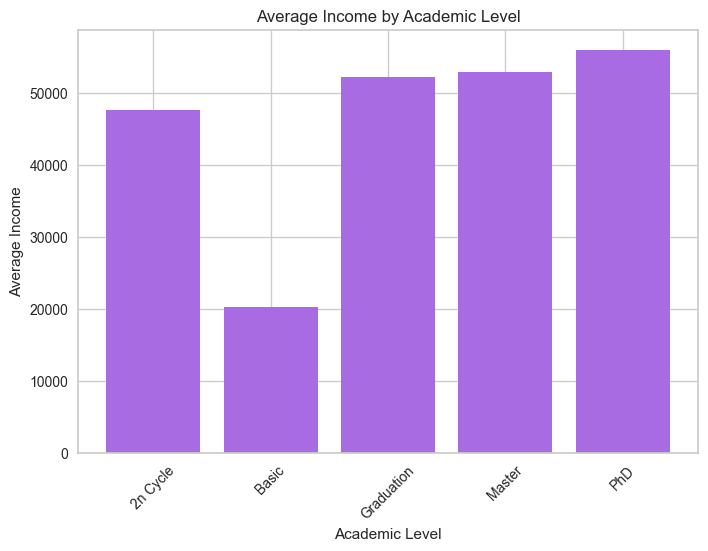

In [49]:
average_income_by_academic_level = combined_data.groupby('Academic_Level')['Income'].mean()
sns.set_palette('Purples')

plt.bar(average_income_by_academic_level.index, average_income_by_academic_level.values, color = '#a86be1')
plt.xlabel('Academic Level')
plt.ylabel('Average Income')
plt.title('Average Income by Academic Level')
plt.xticks(rotation=45)
plt.savefig('Average_Income_by_Academic_Level.png')
plt.show()

Count of id by `Gender` và `Age_quartile`

In [50]:
count_data = combined_data.groupby(['Age_quartile', 'Gender']).size().unstack(fill_value=0).reset_index()

# Melt the data
count_data_melted = count_data.melt(id_vars='Age_quartile', value_vars=['Male', 'Female', 'Other'], var_name='Gender', value_name='Count')

# Create the bar chart
fig = px.bar(count_data_melted, x='Age_quartile', y='Count', color='Gender', 
             title='Count of ID by Gender and Age_quartile', 
             labels={'Age_quartile': 'Age Quartile', 'Count': 'Count of ID'},
             color_discrete_sequence=['#a86be1', '#a5a0ff', '#c931bc'])

# Update the layout
fig.update_layout(
    font=dict(size=25),
    plot_bgcolor='#f5f5f5',
    xaxis_title='Age_quartile',
    yaxis_title='Count of ID',
    legend_title='Gender',
    xaxis_tickangle=-45,
    bargap=0.4,
    barmode='stack',
    width = 800,
    height = 800,
)

fig.update_traces(textfont_size=35)

# Show the plot
fig.show()

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\628707237.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



=> There is no clear distinction between genders.

Total spending by `Age` and `Gender`


In [51]:

# Assuming combined_data is a pandas DataFrame already defined
grouped_data = combined_data.groupby(['Age_quartile', 'Gender'])['Monetary'].sum().unstack()

# Define colors
colors = ['#a86be1', '#a5a0ff', '#c931bc']

# Create a list of bar traces, one for each gender
fig = go.Figure()

for i, (gender, color) in enumerate(zip(grouped_data.columns, colors)):
    fig.add_trace(go.Bar(
        x=grouped_data.index,
        y=grouped_data[gender],
        name=gender,
        marker_color=color
    ))

# Customize the layout
fig.update_layout(
    title='Total spending by Age and Gender',
    xaxis_title='Age',
    yaxis_title='Total spending',
    barmode='stack',
    plot_bgcolor='#f5f5f5',
    legend_title_text='Gender',
    font=dict(size=25),
    width=800,
    height=800,
    bargap=0.4,
    xaxis=dict(tickangle=45),
    yaxis=dict()
)

# Show and save the plot

fig.show()

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\2368067985.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Total spending by `Academic_Level`

In [52]:
fig = go.Figure()
fig.update_layout(
    width=800,
    height=800,
    font_size=15
)

# Sum of spending by academic level
total_spend_aca_data = combined_data.groupby('Academic_Level')['Monetary'].sum()

norm = plt.Normalize(vmin=total_spend_aca_data.min(), vmax=total_spend_aca_data.max())
colors = plt.cm.Purples(norm(total_spend_aca_data.values))

# Create the pie chart
fig.add_trace(go.Pie(
    labels=total_spend_aca_data.index,
    values=total_spend_aca_data,
    marker=dict(colors=[ "#d8c1eb","#652f90","#c5a3e1","#9556c8","#ece0f5"]),
    textinfo='value+percent+label',
    textposition='inside',
    textfont_size=25,
    insidetextorientation='horizontal',
    hoverinfo='label+percent+value'
))

# Add title
fig.update_layout(title="Total Spending by Academic Level", legend_title='Academic Level')

fig.show()

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\2459832617.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



=> The chart shows total spending by educational level. It can be concluded that customers with an educational level of 'Graduation' overwhelms the remaining groups with a rate of 51.6%.

`Income` distribution


In [53]:

fig = go.Figure()
fig.update_layout(
    width=600,
    height=800,
    font_size=15
)

fig.add_trace(go.Histogram(
    x=combined_data['Income'],
    nbinsx=28,
    marker_color='#9556c8',
    name='Income Distribution'
))

# Calculate the KDE
income_values = combined_data['Income'].dropna()
kde = gaussian_kde(income_values)
x_range = np.linspace(income_values.min(), income_values.max(), 1000)
kde_values = kde(x_range)

fig.add_trace(go.Scatter(
    x=x_range,
    y=kde_values * len(income_values) * (income_values.max() - income_values.min()) / 28,
    mode='lines',
    line=dict(color='red', width=2),
    name='Income KDE'
))

# Thêm tiêu đề và lưu biểu đồ
fig.update_layout(
    title='Distribution of Income',
    xaxis_title='Income',
    yaxis_title='Count',
    bargap=0.1
)

fig.show()

=> Customers have income from average - good or higher, widely distributed in the range of 30,000 - 80,000.

Count by `Marriage_status` and `Number_child`


C:\Users\HS\AppData\Local\Temp\ipykernel_22316\1554080728.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



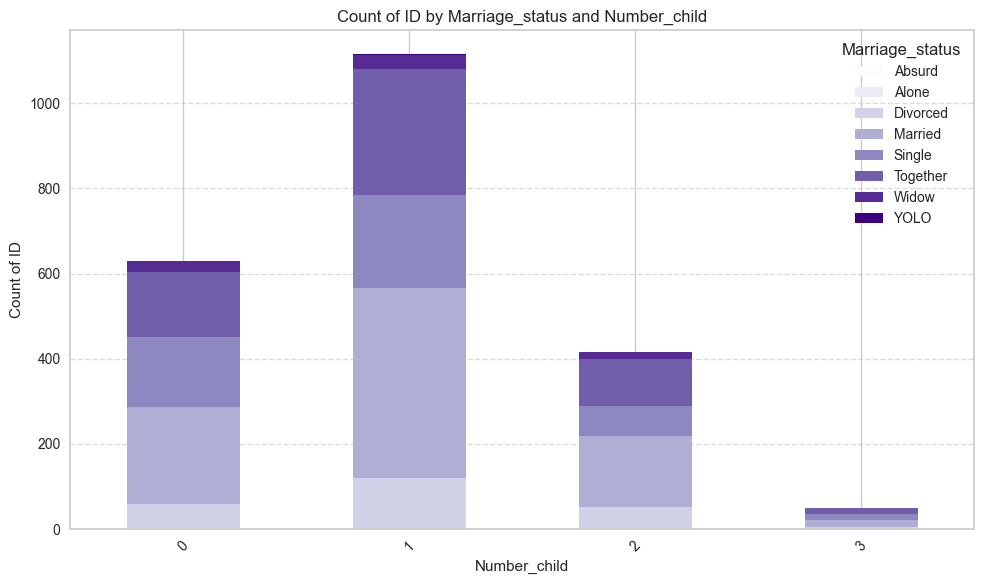

In [54]:
count_data = combined_data.groupby(['Number_child', 'Marriage_status']).size().unstack(fill_value=0)
cmap = plt.get_cmap('Purples')
colors = cmap(np.linspace(0, 1, count_data.shape[1]))
count_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

total_counts = count_data.sum(axis=1)
count_data = count_data.loc[total_counts.sort_values(ascending=False).index]

plt.title('Count of ID by Marriage_status and Number_child')
plt.xlabel('Number_child')
plt.ylabel('Count of ID')
plt.legend(title='Marriage_status')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('ID_by_Marriage_status_and_Number_child.png')
plt.show()

=> The chart describes the distribution of marital status and number of child. Customers are usually married people with one child.

Total spending by `Marriage_status` and `Number_child`

In [55]:

# Assuming combined_data is a pandas DataFrame already defined
grouped_data = combined_data.groupby(['Number_child', 'Marriage_status'])['Monetary'].sum().unstack()

# Define colors using gnuplot2 color map from Matplotlib
cmap = plt.get_cmap('gnuplot2')
colors = [cmap(i / len(grouped_data.columns)) for i in range(len(grouped_data.columns))]
colors = [f'rgba({int(r*255)}, {int(g*255)}, {int(b*255)}, {a})' for r, g, b, a in colors]

# Create a list of bar traces, one for each marriage status
fig = go.Figure()

for i, (status, color) in enumerate(zip(grouped_data.columns, colors)):
    fig.add_trace(go.Bar(
        x=grouped_data.index,
        y=grouped_data[status],
        name=status,
        marker_color=color
    ))

# Customize the layout
fig.update_layout(
    title='Total spending by Marriage status and Number of children',
    xaxis_title='Number of children',
    yaxis_title='Total spending',
    barmode='stack',
    plot_bgcolor='#f5f5f5',
    legend_title_text='Marriage status',
    font=dict(size=25),
    width=1100,
    height=800,
    bargap=0.4,
    xaxis=dict(
        tickangle=45,
        tickmode='linear',  # Ensure all ticks are shown
        tick0=0,            # Start at 0
        dtick=1,            # Step by 1
        type='category'     # Ensure it is treated as a categorical axis
    ),
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor='rgba(0,0,0,0.3)')
)

# Show and save the plot
fig.show()

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\1450879089.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



=> The chart describes the total spending calculated by marital status and number of child. Couples without children tend to spend more.

## Analyzing shopping behavior

Total Purchase by `Payment_Method`

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\2844781921.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



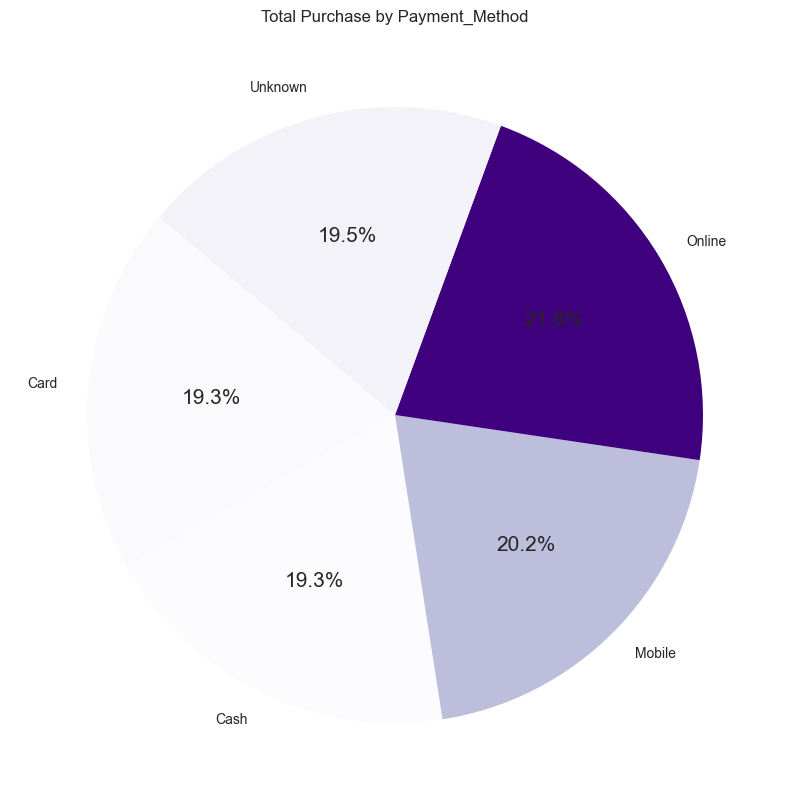

In [56]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 15

payment_purchase_data = combined_data.groupby('Payment_Method')['Total_Purchase'].sum()
# colors = plt.cm.Paired(np.linspace(0, 1, len(age_purchase_data)))
# colors = plt.cm.Reds(np.linspace(0, 1, len(age_purchase_data)))

norm = plt.Normalize(vmin=payment_purchase_data.min(), vmax=payment_purchase_data.max())
sm = plt.cm.ScalarMappable(cmap='Purples', norm=norm)
sm.set_array([])

colors = plt.cm.Purples(norm(payment_purchase_data.values))
def autopct_format(pct):
    return f'{pct:.1f}%' if pct >= 2 else ''

plt.pie(payment_purchase_data, labels=payment_purchase_data.index, colors=colors, autopct=autopct_format, startangle=140)
plt.title("Total Purchase by Payment_Method")
plt.savefig("total_purchase_by_Payment_Method_piechart.png")
plt.show()

Total Spending by `Payment_Method`

In [57]:
fig = go.Figure()
fig.update_layout(
    width=800,
    height=800,
    font_size=15
)

total_spend_payment_data = combined_data.groupby('Payment_Method')['Monetary'].sum()

# Define the color scale
norm = plt.Normalize(vmin=total_spend_payment_data.min(), vmax=total_spend_payment_data.max())
colors = plt.cm.Purples(norm(total_spend_payment_data.values))

# Create the pie chart
fig.add_trace(go.Pie(
    labels=total_spend_payment_data.index,
    values=total_spend_payment_data,
    marker=dict(colors=[ "#d8c1eb","#652f90","#c5a3e1","#9556c8","#ece0f5"]),
    textinfo='value+percent+label',
    textposition='inside',
    textfont_size=25,
    insidetextorientation='horizontal',
    hoverinfo='label+percent+value'
))

# Add title
fig.update_layout(title="Total Spending by Payment Method", legend_title='Payment Method')

fig.show()

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\2049143465.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Total Spending by `Product`

In [58]:
products = pd.DataFrame({
    'Candy': [sum(combined_data['Candy'])],
    'Jewellery': [sum(combined_data['Candy'])],
    'Vegetables': [sum(combined_data['Vegetables'])],
    'Seafood': [sum(combined_data['Seafood'])],
    'Pork': [sum(combined_data['Pork'])],
    'Liquor': [sum(combined_data['Liquor'])]
}, index=['Total'])

columns = products.columns
values = products.values[0]

# Define colors
colors = ["#d8c1eb","#652f90","#c5a3e1","#9556c8","#ece0f5", "#a86be1"]

# Create the pie chart
fig = go.Figure(data=[go.Pie(
    labels=columns,
    values=values,
    marker=dict(colors=colors),
    hoverinfo='label+percent',
    textinfo='label+percent+value',
    textfont_size=25,
)])

# Customize the layout
fig.update_layout(
    title_text='Product Totals',
    width=1200,
    height=1200,
    legend_title='Product',
    font=dict(size=18),
    # annotations=[dict(text='Total', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show and save the plot

fig.show()

=> The product that brings in the main source of revenue is wine, sold mainly through direct sales channels.

Count of `ID` Over Time by `Registration_Time`

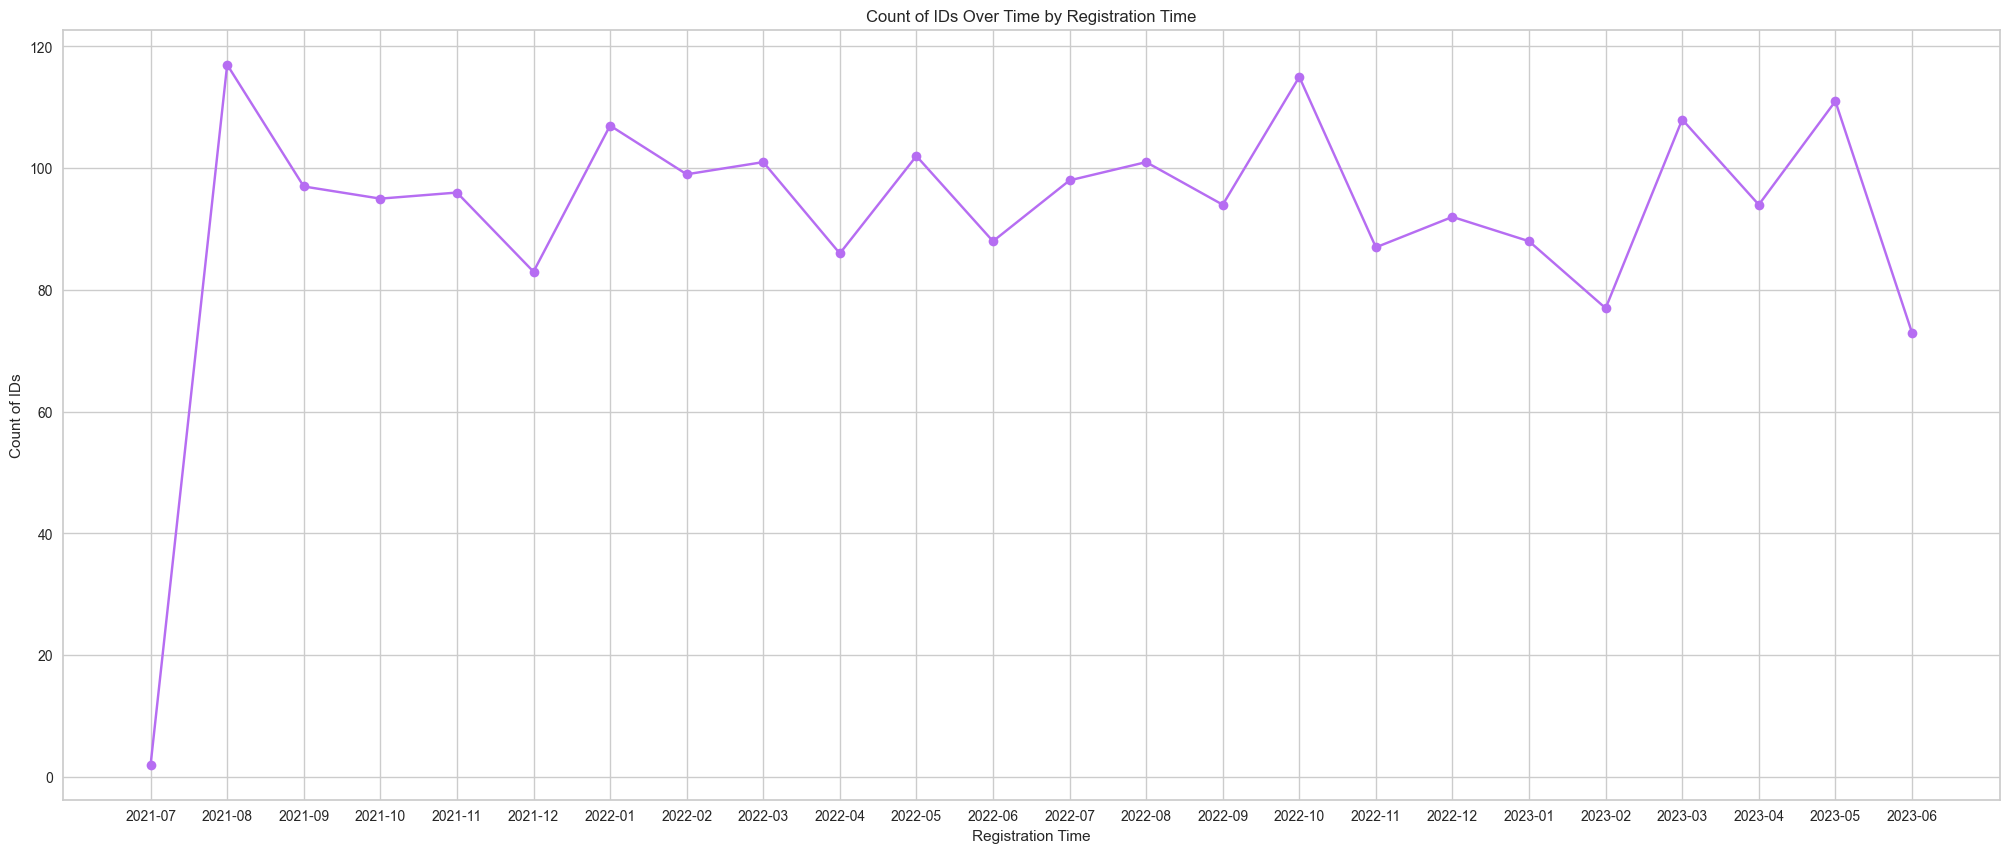

In [59]:
# Sort the data by 'Registration_Time'
combined_data_2 = combined_data.sort_values('Registration_Time')

# Count the number of IDs per registration time
registration_count = combined_data.groupby(combined_data_2['Registration_Time'].dt.strftime('%Y-%m'))['ID'].count()

# Plotting the line chart
plt.figure(figsize=(25, 10))
plt.plot(registration_count.index, registration_count.values, marker='o', linestyle='-', color='#b66df2')

# Adding labels and title
plt.xlabel('Registration Time')
plt.ylabel('Count of IDs')
plt.title('Count of IDs Over Time by Registration Time')

# Adding grid for better readability
plt.grid(True)

# Saving the figure
plt.savefig("Count_of_IDs_by_Registration_Time_linechart.png")
plt.show()

=> The number of registrators over time is stable, ranging from 80 - 110 people.

combined_data.columns

Correlation Matrix of Numeric Columns in Data

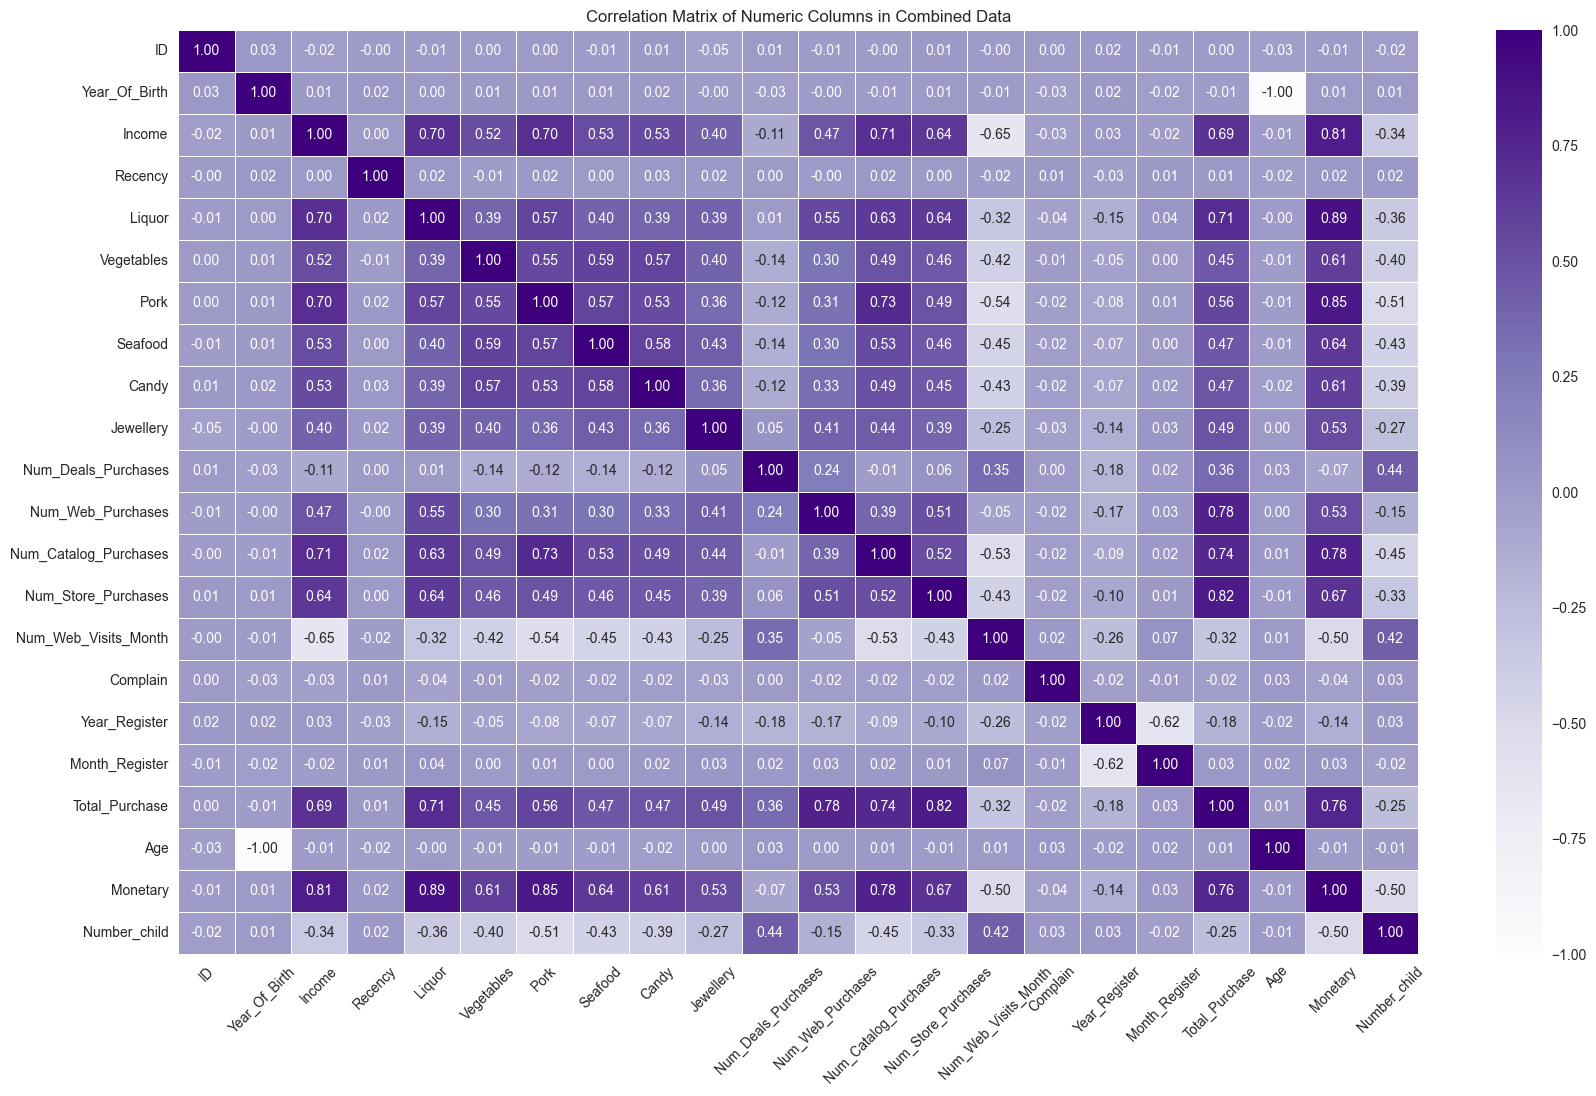

In [60]:
plt.rcParams['figure.figsize'] = (20, 12)
plt.rcParams['font.size'] = 10

# Selecting numeric columns
numeric_columns = combined_data.select_dtypes(include=[np.number])

# Computing the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plotting the heatmap
# plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5)

# Adding labels and title
plt.title('Correlation Matrix of Numeric Columns in Combined Data')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Saving the figure
plt.savefig("Correlation_Matrix_Numeric_Columns.png")
plt.show()

=> The correlation matrix shows the relationship between different variables among the dataset.

Correlation between of `Income` vs `Montery`


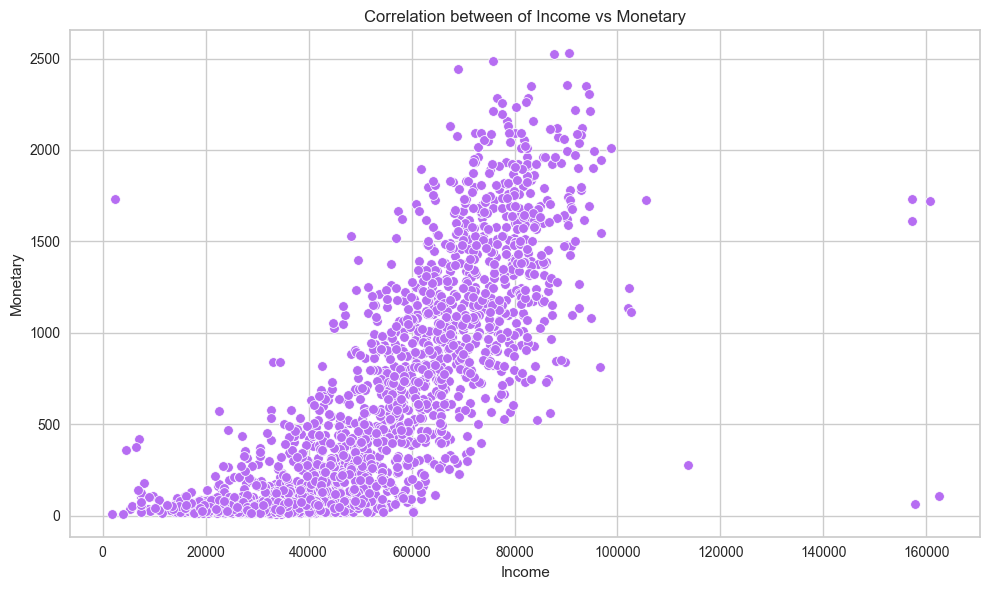

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='Income', y='Monetary', color='#b66df2')
plt.title('Correlation between of Income vs Monetary')
plt.xlabel('Income')
plt.ylabel('Monetary')
plt.tight_layout()
plt.savefig("Correlation_between_Income_and_Monetary_scatter.png")
plt.show()

=> There is a correlation between income and total spending. The higher the income is, the higher the spending is.

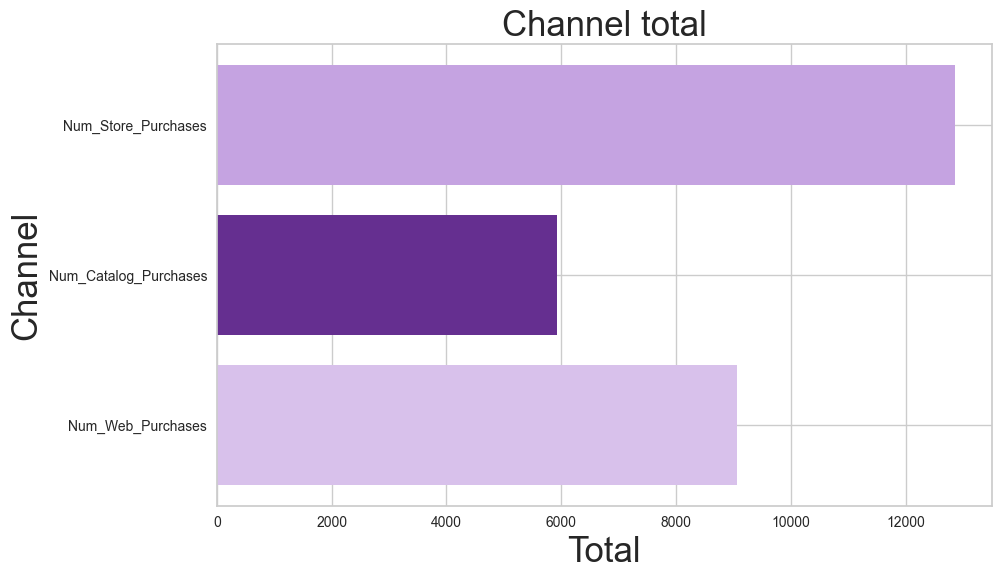

In [62]:
purchase_columns = ['Num_Web_Purchases', 'Num_Catalog_Purchases', 'Num_Store_Purchases']
num_purchase = []
for purchase_method in purchase_columns:
  num_purchase.append(combined_data[purchase_method].sum())

plt.figure(figsize=(10, 6))
plt.barh(purchase_columns, num_purchase, color=["#d8c1eb","#652f90","#c5a3e1"])
plt.xlabel('Total', fontsize = 25)
plt.ylabel('Channel', fontsize = 25)
plt.title('Channel total', fontsize = 25)
plt.savefig('Channel total.svg')
plt.show()

`Promo` Acceptance Rate

In [63]:
colors = ["#d8c1eb","#652f90","#c5a3e1","#9556c8","#ece0f5", "#9c36b5"]
promos = pd.DataFrame({
    'Promo_10': [sum(combined_data['Promo_10'].astype(int))/len(combined_data)],
    'Promo_20': [sum(combined_data['Promo_20'].astype(int))/len(combined_data)],
    'Promo_30': [sum(combined_data['Promo_30'].astype(int))/len(combined_data)],
    'Promo_40': [sum(combined_data['Promo_40'].astype(int))/len(combined_data)],
    'Promo_50': [sum(combined_data['Promo_50'].astype(int))/len(combined_data)],
}, index=['Total'])

columns = promos.columns
values = promos.values[0]
# Create the horizontal bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=values,
    y=columns,
    orientation='h',
    marker=dict(color=colors)
))

# Customize the layout
fig.update_layout(
    title='Promo Totals',
    xaxis_title='Total',
    yaxis_title='Promo',
    plot_bgcolor='#f5f5f5',
    font=dict(size=25),
    width=800,
    height=600
)

# Show and save the plot

fig.show()

=> The adoption rate across campaigns is quite low, except for campaign 40.

Correlation Matrix of `Promo_20` and `Promo_50` in Data

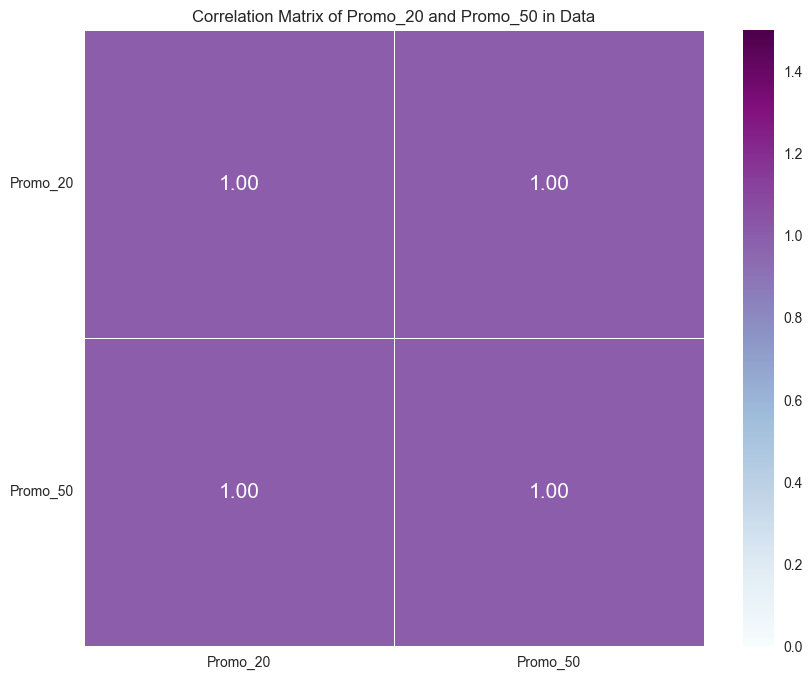

In [64]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 15

# Selecting numeric columns
numeric_columns = combined_data[['Promo_20', 'Promo_50']]

# Computing the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plotting the heatmap
# plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt='.2f', linewidths=0.5, vmin=0, vmax=1.5)

# Adding labels and title
plt.title('Correlation Matrix of Promo_20 and Promo_50 in Data')
# plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Saving the figure
plt.savefig("Correlation_Matrix_Promo_20_and_Promo_50.png")
plt.show()

=> In particular, campaigns 20 and 50 have a high correlation in customer acceptance.

Percentage of customers who complain

In [65]:
complain_count = len(combined_data[combined_data['Complain'] == 1])
complain_count / len(combined_data)

0.009497964721845319

`Num_Deals_Purchases` rate (percentage of customers buying goods with deals)

In [66]:
num_deal_purchase_count = len(combined_data[combined_data['Num_Deals_Purchases'] != 0])
num_deal_purchase_count / len(combined_data)

0.9819086386250565

`Num_Web_Visits_Month` rate (percentage of customers visiting website in a month)

In [67]:
num_web_visit_count = len(combined_data[combined_data['Num_Web_Visits_Month'] != 0])
num_web_visit_count / len(combined_data)

0.9963817277250113

## Analyze unsatisfied customers (with complaint(s))

Create a dataframe with unsatisfied customers

In [68]:
combined_data_2 = combined_data[combined_data['Complain'] == 1]
combined_data_2.sample(5)

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Month_Register,Total_Purchase,Living_With,Payment_Method,Phone_num,Age,Monetary,Marriage_status,Number_child,Age_quartile
ID,,,,,,,,,,,,,,,,,,,,,
9147,9147,1982.0,Graduation,57957.0,2022-08-19,24.0,291.0,61.0,177.0,77.0,...,8,25.0,Together_1,Cash,84846424915.0,42,640.0,Together,1,39+
8904,8904,1994.0,Graduation,17688.0,2022-01-13,82.0,3.0,4.0,1.0,3.0,...,1,4.0,Married_1,Unknown,84482441750.0,30,14.0,Married,1,22-33
6883,6883,1988.0,Graduation,37774.0,2021-09-03,28.0,174.0,10.0,107.0,7.0,...,9,16.0,Single_2,Unknown,84250360750.0,36,476.0,Single,2,36-39
6226,6226,1989.0,PhD,39684.0,2021-10-12,41.0,20.0,2.0,35.0,6.0,...,10,7.0,Single_1,Cash,84779191969.0,35,84.0,Single,1,33-36
5604,5604,1989.0,Graduation,58113.0,2022-01-25,66.0,222.0,106.0,169.0,102.0,...,1,22.0,Married_1,Mobile,84940021092.0,35,761.0,Married,1,33-36


In [69]:
combined_data_2

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Month_Register,Total_Purchase,Living_With,Payment_Method,Phone_num,Age,Monetary,Marriage_status,Number_child,Age_quartile
ID,,,,,,,,,,,,,,,,,,,,,
1455,1455,1975.0,Master,65073.0,2022-08-20,65.0,630.0,19.0,177.0,69.0,...,8,14.0,Married_0,Mobile,84867409136.0,49,903.0,Married,0,39+
1500,1500,1996.0,Graduation,38643.0,2022-11-29,45.0,23.0,4.0,14.0,0.0,...,11,7.0,Single_2,Cash,84134068711.0,28,52.0,Single,2,22-33
1697,1697,1982.0,2n Cycle,15716.0,2021-11-12,8.0,17.0,7.0,30.0,8.0,...,11,10.0,Married_1,Card,84671359424.0,42,95.0,Married,1,39+
2294,2294,1987.0,Graduation,48070.0,2022-01-13,33.0,374.0,16.0,83.0,6.0,...,1,19.0,Together_1,Unknown,84030121064.0,37,507.0,Together,1,36-39
2957,2957,1990.0,Master,31788.0,2023-03-20,15.0,17.0,9.0,23.0,0.0,...,3,10.0,Single_1,Online,84760128937.0,34,63.0,Single,1,33-36
3433,3433,1983.0,Graduation,38547.0,2022-08-28,49.0,7.0,3.0,10.0,0.0,...,8,4.0,Together_1,Mobile,84202790472.0,41,25.0,Together,1,39+
5474,5474,1989.0,Graduation,38998.0,2021-11-03,92.0,35.0,3.0,14.0,0.0,...,11,8.0,Married_2,Mobile,84516184081.0,35,57.0,Married,2,33-36
5604,5604,1989.0,Graduation,58113.0,2022-01-25,66.0,222.0,106.0,169.0,102.0,...,1,22.0,Married_1,Mobile,84940021092.0,35,761.0,Married,1,33-36
5727,5727,1981.0,Graduation,80982.0,2022-01-08,48.0,506.0,139.0,401.0,104.0,...,1,30.0,Single_2,Mobile,84751823431.0,43,1194.0,Single,2,39+


`Gender` distribution who complain


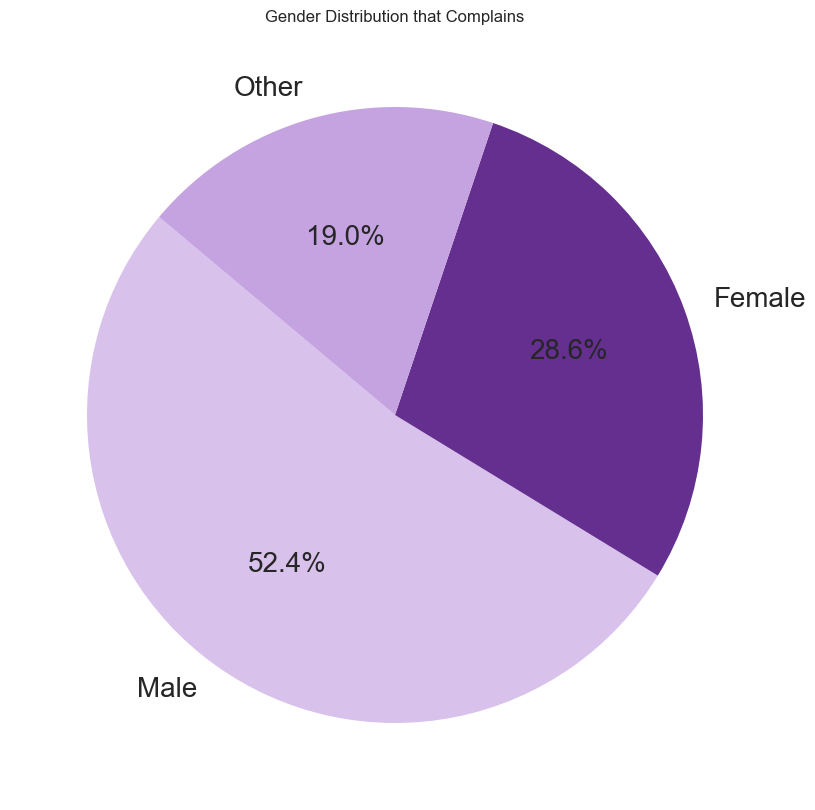

In [70]:
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 25

gender_counts = combined_data_2['Gender'].value_counts()
colors = ["#d8c1eb","#652f90","#c5a3e1","#9556c8","#ece0f5"]

plt.pie(gender_counts, labels=gender_counts.index, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 20})
plt.title("Gender Distribution that Complains")
plt.savefig("gender_distribution_complain_piechart.png")
plt.show()

=> Regarding gender, the customer base is mainly male.

`Spending` by `Number_child` and `Marriage_status`

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\827013295.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



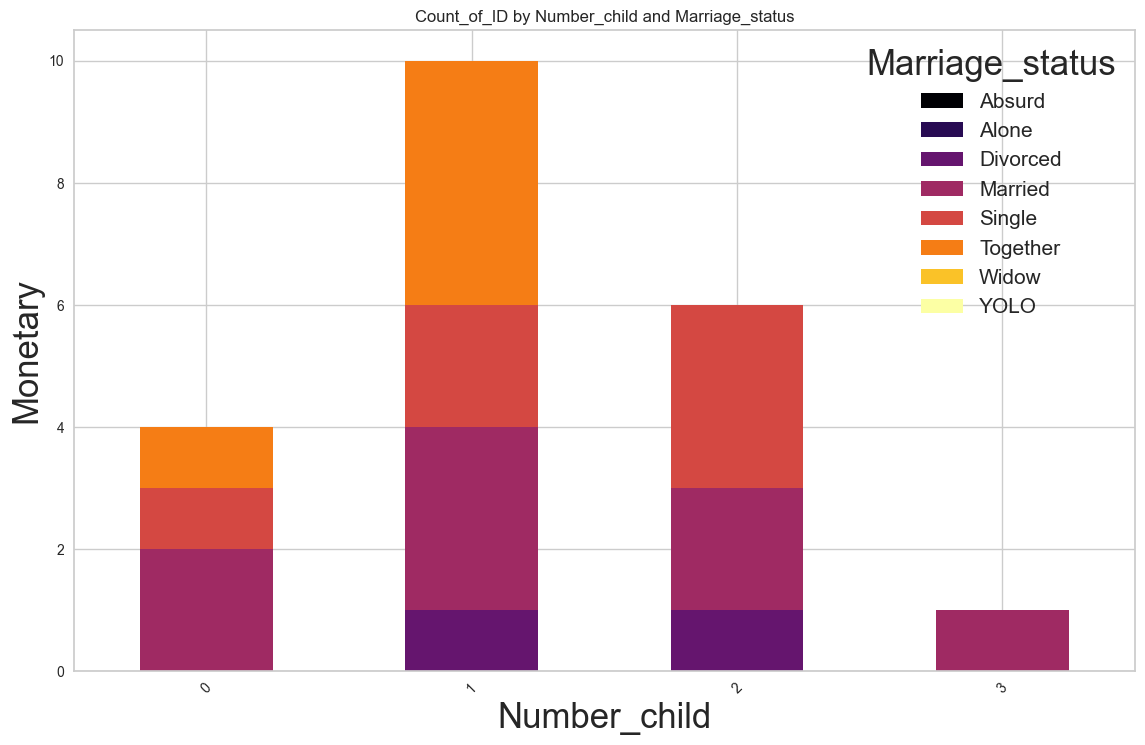

In [71]:
grouped_data = combined_data_2.groupby(['Number_child', 'Marriage_status'])['ID'].count().unstack()
plt.rcParams['font.size'] = 25

cmap = plt.get_cmap('inferno')
colors = cmap(np.linspace(0, 1, grouped_data.shape[1]))
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)

plt.title('Count_of_ID by Number_child and Marriage_status')
plt.xlabel('Number_child', fontsize=25)
plt.ylabel('Monetary', fontsize=25)
plt.legend(title='Marriage_status', fontsize=15)
plt.xticks(rotation=45)
# plt.grid(axis='y', alpha=0.7)

plt.tight_layout()
plt.savefig('Count_of_ID_by_Number_child_Marriage_status.png')
plt.show()

=> The majority of customers are married and have more than 1 child.

 Check `Recency` of unsatisfied customers

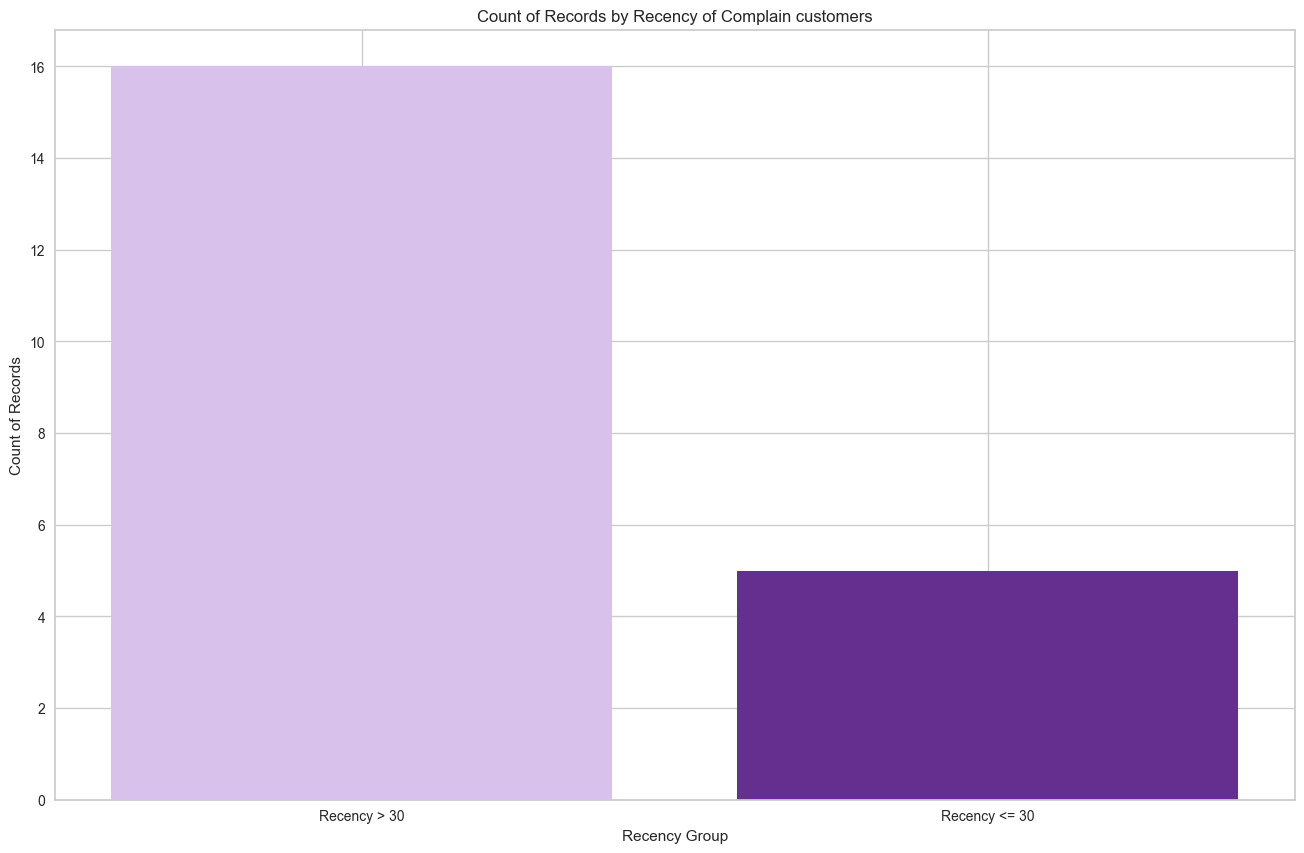

In [72]:
# recency

plt.rcParams['figure.figsize'] = (16,10)
plt.rcParams['font.size'] = 15

recency_higher = combined_data_2[combined_data_2['Recency'] > 30]
recency_lower = combined_data_2[combined_data_2['Recency'] <= 30]

counts = [recency_higher.shape[0], recency_lower.shape[0]]
labels = ['Recency > 30', 'Recency <= 30']

plt.bar(labels, counts, color=["#d8c1eb","#652f90"])

plt.title('Count of Records by Recency of Complain customers')
plt.xlabel('Recency Group')
plt.ylabel('Count of Records')

plt.savefig("recency_group_counts.png")
plt.show()

=> The recency values of customers are mostly over 1 month.

Calculate the engaged time with business (by measuring the time from registration to the recency)

In [73]:
CURRENT_DAY = pd.to_datetime('today')
combined_data_2['latest_day'] = CURRENT_DAY - pd.to_timedelta(combined_data_2['Recency'], unit='d')

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\475436366.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [74]:
combined_data_2['month_attached'] = (combined_data_2['latest_day'] - combined_data_2['Registration_Time']) / pd.Timedelta(days=30)
combined_data_2['month_attached'] = combined_data_2['month_attached'].astype(int)
combined_data_2.head()

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\3392491395.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\3392491395.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Living_With,Payment_Method,Phone_num,Age,Monetary,Marriage_status,Number_child,Age_quartile,latest_day,month_attached
ID,,,,,,,,,,,,,,,,,,,,,
1455,1455,1975.0,Master,65073.0,2022-08-20,65.0,630.0,19.0,177.0,69.0,...,Married_0,Mobile,84867409136.0,49,903.0,Married,0,39+,2024-03-29 21:36:44.123092,19
1500,1500,1996.0,Graduation,38643.0,2022-11-29,45.0,23.0,4.0,14.0,0.0,...,Single_2,Cash,84134068711.0,28,52.0,Single,2,22-33,2024-04-18 21:36:44.123092,16
1697,1697,1982.0,2n Cycle,15716.0,2021-11-12,8.0,17.0,7.0,30.0,8.0,...,Married_1,Card,84671359424.0,42,95.0,Married,1,39+,2024-05-25 21:36:44.123092,30
2294,2294,1987.0,Graduation,48070.0,2022-01-13,33.0,374.0,16.0,83.0,6.0,...,Together_1,Unknown,84030121064.0,37,507.0,Together,1,36-39,2024-04-30 21:36:44.123092,27
2957,2957,1990.0,Master,31788.0,2023-03-20,15.0,17.0,9.0,23.0,0.0,...,Single_1,Online,84760128937.0,34,63.0,Single,1,33-36,2024-05-18 21:36:44.123092,14


In [75]:
combined_data_complain = combined_data_2[['ID', 'Gender', 'Marriage_status', 'Number_child', 'month_attached', 'Num_Deals_Purchases', 'Recency']]
combined_data_complain

,ID,Gender,Marriage_status,Number_child,month_attached,Num_Deals_Purchases,Recency
ID,,,,,,,
1455,1455,Other,Married,0,19,1.0,65.0
1500,1500,Female,Single,2,16,2.0,45.0
1697,1697,Male,Married,1,30,3.0,8.0
2294,2294,Male,Together,1,27,3.0,33.0
2957,2957,Female,Single,1,14,3.0,15.0
3433,3433,Male,Together,1,19,1.0,49.0
5474,5474,Other,Married,2,28,3.0,92.0
5604,5604,Male,Married,1,26,3.0,66.0
5727,5727,Male,Single,2,27,3.0,48.0


=> Most have been with the company for a long time, mostly over 1 year.

# Data Modelling

## RFM

In [76]:
combined_data

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Month_Register,Total_Purchase,Living_With,Payment_Method,Phone_num,Age,Monetary,Marriage_status,Number_child,Age_quartile
ID,,,,,,,,,,,,,,,,,,,,,
1001,1001,1994.0,Graduation,61074.0,2021-08-17,37.0,790.0,2.0,133.0,0.0,...,8,31.0,Married_1,Card,84120361225.0,30,1105.0,Married,1,22-33
1002,1002,1989.0,Graduation,60093.0,2022-06-26,92.0,503.0,14.0,109.0,16.0,...,6,21.0,Married_1,Mobile,84948328015.0,35,738.0,Married,1,33-36
1005,1005,1978.0,2n Cycle,79689.0,2022-05-12,65.0,312.0,28.0,640.0,180.0,...,5,27.0,Single_0,Online,84440283305.0,46,1318.0,Single,0,39+
1006,1006,1987.0,Master,41021.0,2021-12-30,12.0,15.0,9.0,9.0,6.0,...,12,7.0,Together_1,Online,84940063568.0,37,67.0,Together,1,36-39
1007,1007,1996.0,PhD,57333.0,2021-09-22,55.0,942.0,16.0,397.0,76.0,...,9,33.0,Divorced_1,Card,84339387894.0,28,1665.0,Divorced,1,22-33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,9980,1992.0,Graduation,22010.0,2022-06-30,51.0,12.0,4.0,9.0,3.0,...,6,7.0,Together_1,Online,84647125554.0,32,36.0,Together,1,22-33
9985,9985,1986.0,Graduation,38361.0,2022-12-27,74.0,40.0,2.0,56.0,20.0,...,12,10.0,Together_1,Cash,84474405959.0,38,140.0,Together,1,36-39
9986,9986,1990.0,Graduation,56628.0,2023-03-21,30.0,480.0,7.0,82.0,7.0,...,3,20.0,Single_1,Mobile,84893005097.0,34,764.0,Single,1,33-36


In [77]:
rfm_data = pd.DataFrame({
    'ID': combined_data['ID'],
    'Recency': combined_data['Recency'],
    'Frequency': combined_data['Total_Purchase'],
    'Monetary': combined_data['Monetary']
})

rfm_data

,ID,Recency,Frequency,Monetary
ID,,,,
1001,1001,37.0,31.0,1105.0
1002,1002,92.0,21.0,738.0
1005,1005,65.0,27.0,1318.0
1006,1006,12.0,7.0,67.0
1007,1007,55.0,33.0,1665.0
...,...,...,...,...
9980,9980,51.0,7.0,36.0
9985,9985,74.0,10.0,140.0
9986,9986,30.0,20.0,764.0


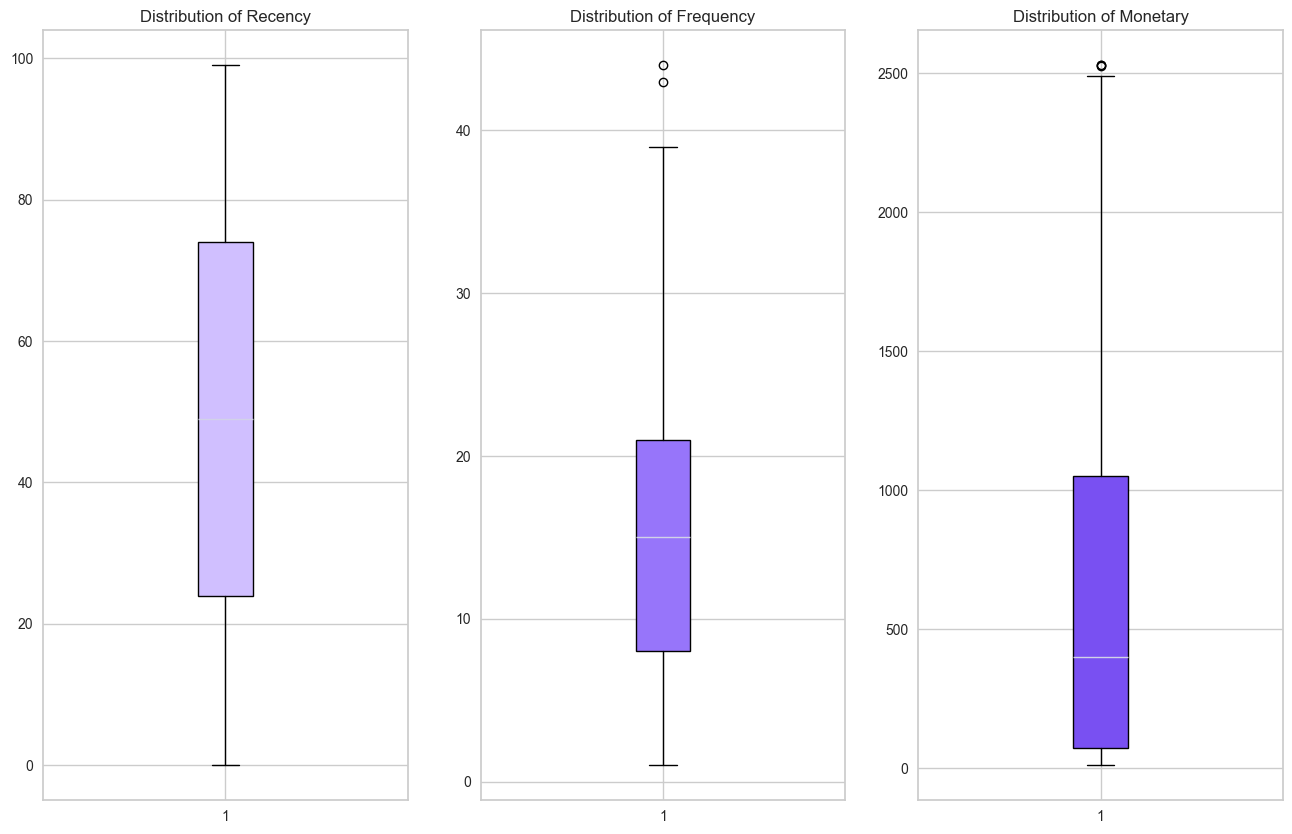

In [78]:
# Draw the box plot for each feature

features = ['Recency', 'Frequency', 'Monetary']
def plotBoxplot(feats, df):
  fig, axs = plt.subplots(1, 3)
  i = 0
  colors = ['#d0bfff', '#9775fa', '#7950f2']
  for i in range(3):
    plt.rcParams['figure.figsize'] = [18, 10]
    box = axs[i].boxplot(df[feats[i]], patch_artist = True)
    for patch, color in zip(box['boxes'], colors[i:i+1]):
      patch.set_facecolor(color)  # Tô màu cho các hộp
    axs[i].set_title('Distribution of '+ feats[i])
    i +=1
  plt.show()
plotBoxplot(features, rfm_data)

It can be concluded that there are some outliers in the Frequency feature and Monetary feature. Regarding K-means method, the clustering is sensitive to outliers, so we need to find and remove the outliers.

In [79]:
features = ['Recency', 'Frequency', 'Monetary']

def find_outliers(df, features):
    outliers = {}
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_ids = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]['ID'].tolist()
        outliers[feature] = outlier_ids
    return outliers

# Find all outliers
outliers = find_outliers(rfm_data, features)

outlier_ids = set()
for feature in features:
    outlier_ids.update(outliers[feature])

# Print outliers ID
for feature in features:
    print(f"Outliers for {feature}: {outliers[feature]}")

Outliers for Recency: []
Outliers for Frequency: [8473, 9560]
Outliers for Monetary: [1950, 8237, 8961]


Remove outliers

In [80]:
rfm_data = rfm_data[~rfm_data['ID'].isin(outlier_ids)]
combined_data = combined_data[~combined_data['ID'].isin(outlier_ids)]

print("Data without outliers:")
print(rfm_data)

Data without outliers:
        ID  Recency  Frequency  Monetary
ID                                      
1001  1001     37.0       31.0    1105.0
1002  1002     92.0       21.0     738.0
1005  1005     65.0       27.0    1318.0
1006  1006     12.0        7.0      67.0
1007  1007     55.0       33.0    1665.0
...    ...      ...        ...       ...
9980  9980     51.0        7.0      36.0
9985  9985     74.0       10.0     140.0
9986  9986     30.0       20.0     764.0
9990  9990     94.0       29.0    1112.0
9997  9997     26.0       20.0     399.0

[2206 rows x 4 columns]


In [81]:
rfm_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2206.0,5491.731641,2590.531560,1001.0,3273.0,5509.5,7726.25,9997.0
Recency,2206.0,49.031732,28.969417,0.0,24.0,49.0,74.00,99.0
Frequency,2206.0,14.874433,7.606544,1.0,8.0,15.0,21.00,39.0
Monetary,2206.0,607.791931,598.505758,11.0,72.0,399.5,1047.75,2489.0


Plot the shape of the distribution of R, F, M

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\1104578985.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\HS\AppData\Local\Temp\ipykernel_22316\1104578985.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\HS\AppData\Local\Temp\ipykernel_22316\1104578985.py:5: UserWarning:



`distplot` is a deprec

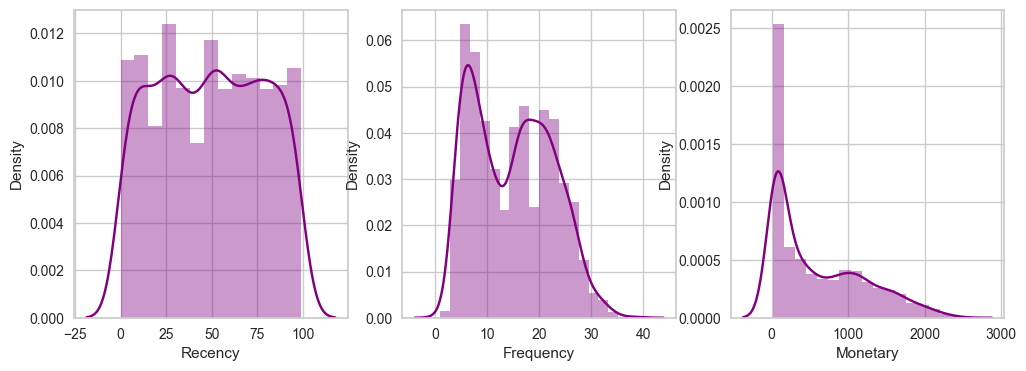

In [82]:
#check if data is skewed
fig, ax = plt.subplots (1, 3, figsize=(12,4))
sns.distplot(rfm_data['Recency'], ax = ax[0], color='purple')
sns.distplot(rfm_data['Frequency'], ax = ax[1], color='purple')
sns.distplot(rfm_data['Monetary'], ax = ax[2], color='purple')
plt.show()

=> The distribution chart shows that except for the Recency column, which has a normal distribution shape, the Frequency column tends to be slightly right-skewed, with a bi-peaked distribution, and the Monetary column has a clearly right-skewed distribution.

Apply Box-Cox transformation and cubic transformation to transform data into normal distribution.

In [83]:
rfm_data_transform = pd.DataFrame()
rfm_data_transform['Frequency'] = pd.Series(stats.boxcox(rfm_data['Frequency'])[0]).reset_index(drop=True)
rfm_data_transform['Monetary'] = pd.Series(np.cbrt(rfm_data['Monetary'])).reset_index(drop=True)
rfm_data_transform['Recency'] = rfm_data['Recency'].reset_index(drop=True)
print(rfm_data_transform.head(10))

   Frequency   Monetary  Recency
0   9.316896  10.338418     37.0
1   7.288258   9.036886     92.0
2   8.550871  10.964070     65.0
3   3.325055   4.061548     12.0
4   9.681667  11.852358     55.0
5   7.061307  10.679455     74.0
6   7.938996   9.757500      2.0
7   3.325055   4.414005     73.0
8   7.509962  11.305487     10.0
9   4.994819   6.045944     48.0


In [84]:
rfm_data_transform.describe()


,Frequency,Monetary,Recency
count,2206.000000,2206.000000,2206.000000
mean,5.515060,7.301366,49.031732
std,2.115445,3.139375,28.969417
min,0.000000,2.223980,0.000000
25%,3.697071,4.160168,24.000000
50%,5.831885,7.364990,49.000000
75%,7.288258,10.156698,74.000000
max,10.715242,13.552153,99.000000


Apply StandardScaler to scale data

In [85]:
scaler = StandardScaler()
scaler.fit(rfm_data_transform)

rfm_data_transform = scaler.transform(rfm_data_transform)

In [86]:
pd.DataFrame(rfm_data_transform).head()

,0,1,2
0,1.797588,0.967626,-0.415419
1,0.838405,0.552948,1.483565
2,1.435395,1.166963,0.551336
3,-1.035480,-1.032229,-1.278594
4,1.970059,1.449977,0.206066


In [87]:
df_rfm_data_transform = pd.DataFrame(rfm_data_transform)
df_rfm_data_transform

,0,1,2
0,1.797588,0.967626,-0.415419
1,0.838405,0.552948,1.483565
2,1.435395,1.166963,0.551336
3,-1.035480,-1.032229,-1.278594
4,1.970059,1.449977,0.206066
...,...,...,...
2201,-1.035480,-1.274249,0.067958
2202,-0.537602,-0.671901,0.862079
2203,0.731098,0.586371,-0.657108
2204,1.619560,0.974567,1.552619


## KMeans

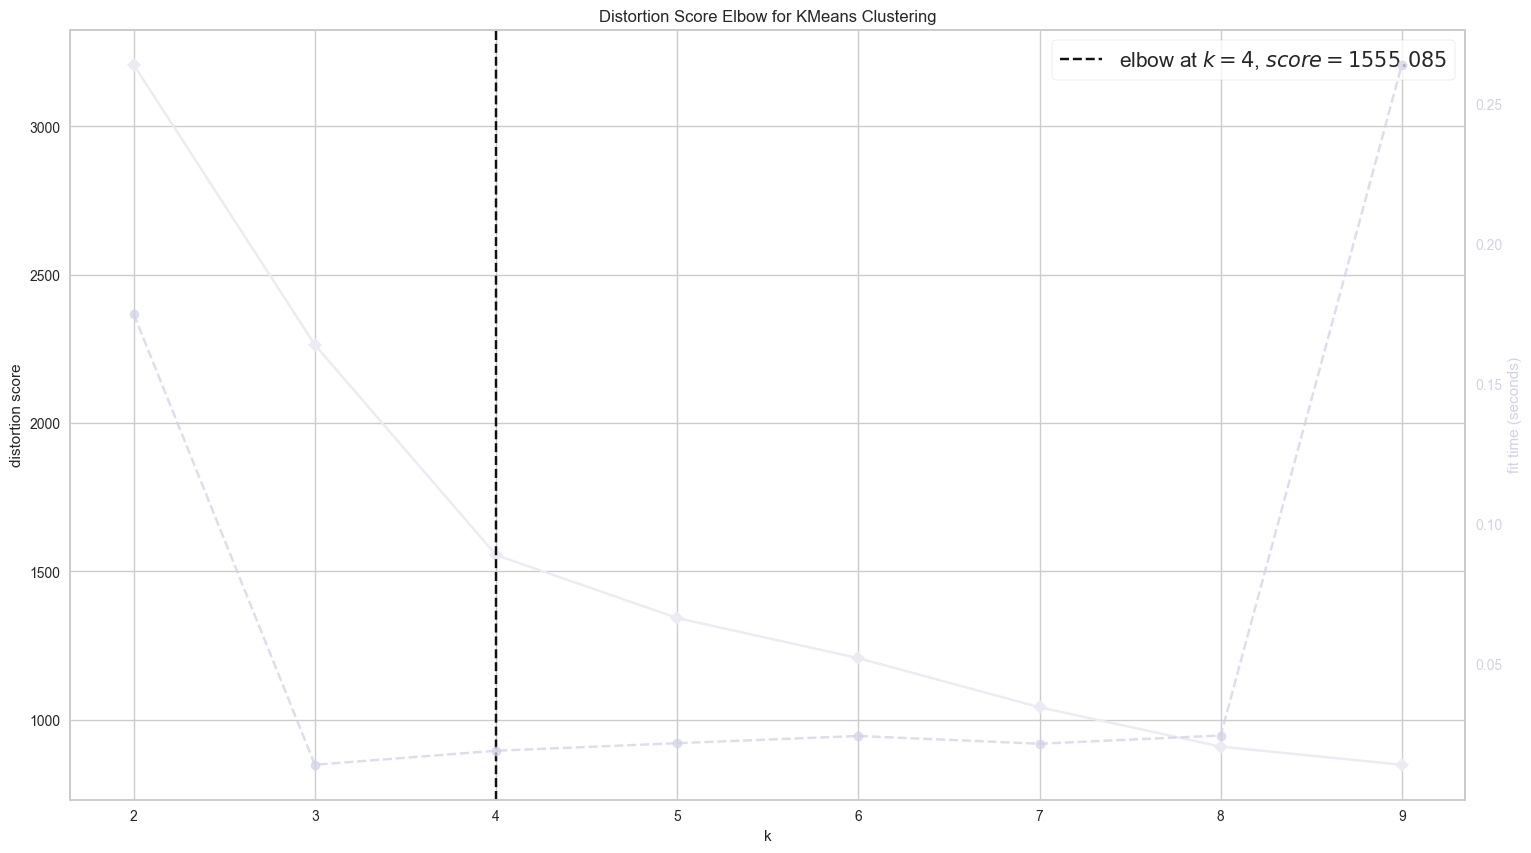

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [88]:
k_means = KMeans(random_state=42)
elbow = KElbowVisualizer(k_means, k=(2, 10))
elbow.fit(rfm_data_transform)
elbow.show()

=> Select k = 4 as the optimal value.

Fit K-means model with k = 4

In [89]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(rfm_data_transform)
rfm_data['Cluster_KMeans'] = model.labels_
rfm_data.head()

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\1562727453.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,Recency,Frequency,Monetary,Cluster_KMeans
ID,,,,,
1001,1001,37.0,31.0,1105.0,1
1002,1002,92.0,21.0,738.0,2
1005,1005,65.0,27.0,1318.0,2
1006,1006,12.0,7.0,67.0,0
1007,1007,55.0,33.0,1665.0,2


In [90]:
rfm_data.groupby('Cluster_KMeans').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean',
        'Cluster_KMeans':'size'
    }
).round(2)

,Recency,Frequency,Monetary,Cluster_KMeans
Cluster_KMeans,,,,
0,25.27,7.23,81.99,507
1,22.22,20.61,990.67,578
2,72.15,20.98,1066.38,634
3,75.49,8.08,103.77,487


## BIRCH

In [91]:
from sklearn.cluster import Birch

birch_model = Birch(threshold=0.1, n_clusters=4)
birch_df = birch_model.fit_predict(rfm_data_transform)
rfm_data['Cluster_Birch'] = birch_df

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\2959854611.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [92]:
rfm_data.groupby('Cluster_Birch').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean',
        'Cluster_Birch':'size'
    }
).round(2)

,Recency,Frequency,Monetary,Cluster_Birch
Cluster_Birch,,,,
0,71.89,19.46,921.91,631
1,29.55,7.14,75.79,573
2,26.08,21.39,1062.01,643
3,81.06,7.49,91.26,359


## Hierarchical Clustering

In [93]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')

clusters = hierarchical_cluster.fit_predict(rfm_data_transform)

rfm_data["Cluster_Hierarchical"] = clusters

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\1280614993.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [94]:
rfm_data.groupby('Cluster_Hierarchical').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean',
        'Cluster_Hierarchical':'size'
    }
).round(2)

,Recency,Frequency,Monetary,Cluster_Hierarchical
Cluster_Hierarchical,,,,
0,23.32,20.96,992.37,601
1,70.14,7.67,90.10,558
2,72.01,20.15,1011.78,657
3,19.74,6.93,75.28,390


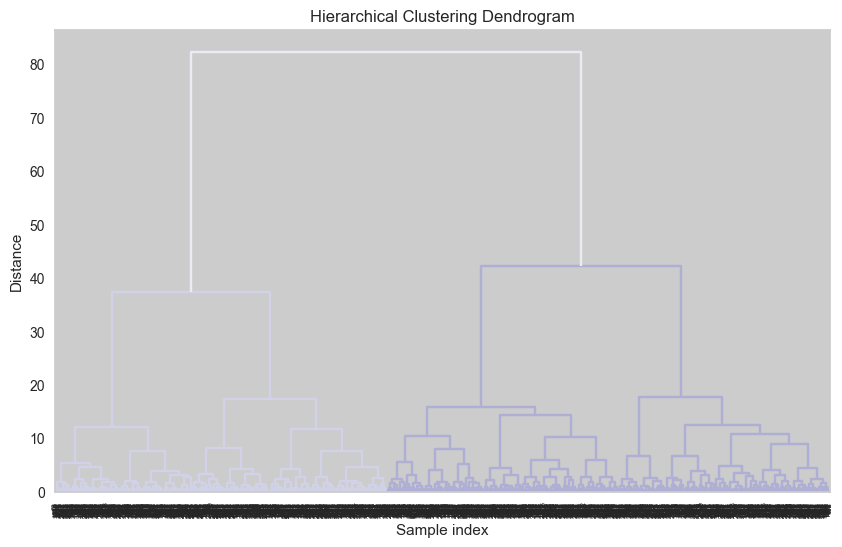

In [95]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 6))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")

linkage_data = linkage(rfm_data_transform, method='ward')
dendrogram(linkage_data)
plt.show()

## Spectral Clustering

In [96]:
from sklearn.cluster import SpectralClustering

spectral_cluster = SpectralClustering(n_clusters=4, random_state=42)
clusters = spectral_cluster.fit_predict(rfm_data_transform)

rfm_data["Cluster_Spectral"] = clusters

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\2636101575.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [97]:
rfm_data.groupby('Cluster_Spectral').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean',
        'Cluster_Spectral':'size'
    }
).round(2)

,Recency,Frequency,Monetary,Cluster_Spectral
Cluster_Spectral,,,,
0,22.13,20.70,1003.69,576
1,76.19,7.65,92.32,452
2,72.24,20.67,1028.50,658
3,25.86,7.37,84.97,520


## Gaussian Mixture Model

In [98]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=42)
clusters = gmm.fit_predict(rfm_data_transform)

rfm_data["Cluster_GMM"] = clusters

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\3493745856.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
rfm_data.groupby('Cluster_GMM').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean',
        'Cluster_GMM':'size'
    }
).round(2)

,Recency,Frequency,Monetary,Cluster_GMM
Cluster_GMM,,,,
0,26.26,7.35,80.60,523
1,21.10,20.55,993.99,555
2,70.94,21.10,1086.37,634
3,76.40,8.47,117.84,494


# Comparison between models

In [100]:
from sklearn.metrics import silhouette_score

silhouette_kmeans = silhouette_score(rfm_data_transform, rfm_data['Cluster_KMeans'])
silhouette_birch = silhouette_score(rfm_data_transform, rfm_data['Cluster_Birch'])
silhouette_hierarchical = silhouette_score(rfm_data_transform, rfm_data['Cluster_Hierarchical'])
silhouette_spectral = silhouette_score(rfm_data_transform, rfm_data['Cluster_Spectral'])
silhouette_gaussian = silhouette_score(rfm_data_transform, rfm_data['Cluster_GMM'])

num_cluster_kmeans = rfm_data['Cluster_KMeans'].nunique()
num_cluster_birch = rfm_data['Cluster_Birch'].nunique()
num_cluster_hierarchical = rfm_data['Cluster_Hierarchical'].nunique()
num_cluster_spectral = rfm_data['Cluster_Spectral'].nunique()
num_cluster_gaussian = rfm_data['Cluster_GMM'].nunique()

silhouette_scores = pd.DataFrame({
    'Model': ['KMeans', 'Birch', 'Hierarchical', 'Spectral', 'Gaussian'],
    'Silhouette Score': [silhouette_kmeans, silhouette_birch, silhouette_hierarchical, silhouette_spectral, silhouette_gaussian],
    'Number of Cluster': [num_cluster_kmeans, num_cluster_birch, num_cluster_hierarchical, num_cluster_spectral, num_cluster_gaussian]
})

silhouette_scores

,Model,Silhouette Score,Number of Cluster
0,KMeans,0.400763,4
1,Birch,0.364869,4
2,Hierarchical,0.380105,4
3,Spectral,0.400161,4
4,Gaussian,0.393734,4


## Visualize clustering methods

In [101]:
def visualize_3D(df, feature):
    cluster_sizes = df[feature].value_counts().sort_values(ascending=False)

    # Define the color map based on sorted cluster sizes
    color_list = ['blue', 'green', 'orange', 'pink']
    color_map = {cluster: color_list[i] for i, cluster in enumerate(cluster_sizes.index)}

    # Create the 3D scatter plot
    fig = go.Figure()

    for cluster in cluster_sizes.index:
        cluster_data = df[df[feature] == cluster]
        fig.add_trace(go.Scatter3d(
            x=cluster_data['Recency'],
            y=cluster_data['Frequency'],
            z=cluster_data['Monetary'],
            text=cluster_data['ID'],
            mode='markers',
            marker=dict(
                size=10,
                color=color_map[cluster],
                opacity=0.8
            ),
            name=f'Cluster {cluster} ({cluster_sizes[cluster]})'
        ))

    fig.update_layout(scene=dict(
                        xaxis_title='Recency',
                        yaxis_title='Frequency',
                        zaxis_title='Monetary'),
                        title='3D Scatter Plot with Cluster Colors',
                        margin=dict(l=0, r=0, b=0, t=0),
                        width=600,
                        height=600
                        )
    fig.show()

Visualize KMeans

In [102]:
visualize_3D(rfm_data, 'Cluster_KMeans')

In [103]:
visualize_3D(rfm_data, 'Cluster_Birch')


In [104]:
visualize_3D(rfm_data, 'Cluster_Hierarchical')


In [105]:
visualize_3D(rfm_data, 'Cluster_Spectral')


In [106]:
visualize_3D(rfm_data, 'Cluster_GMM')


## Choosing the best hyperparameters for KMeans

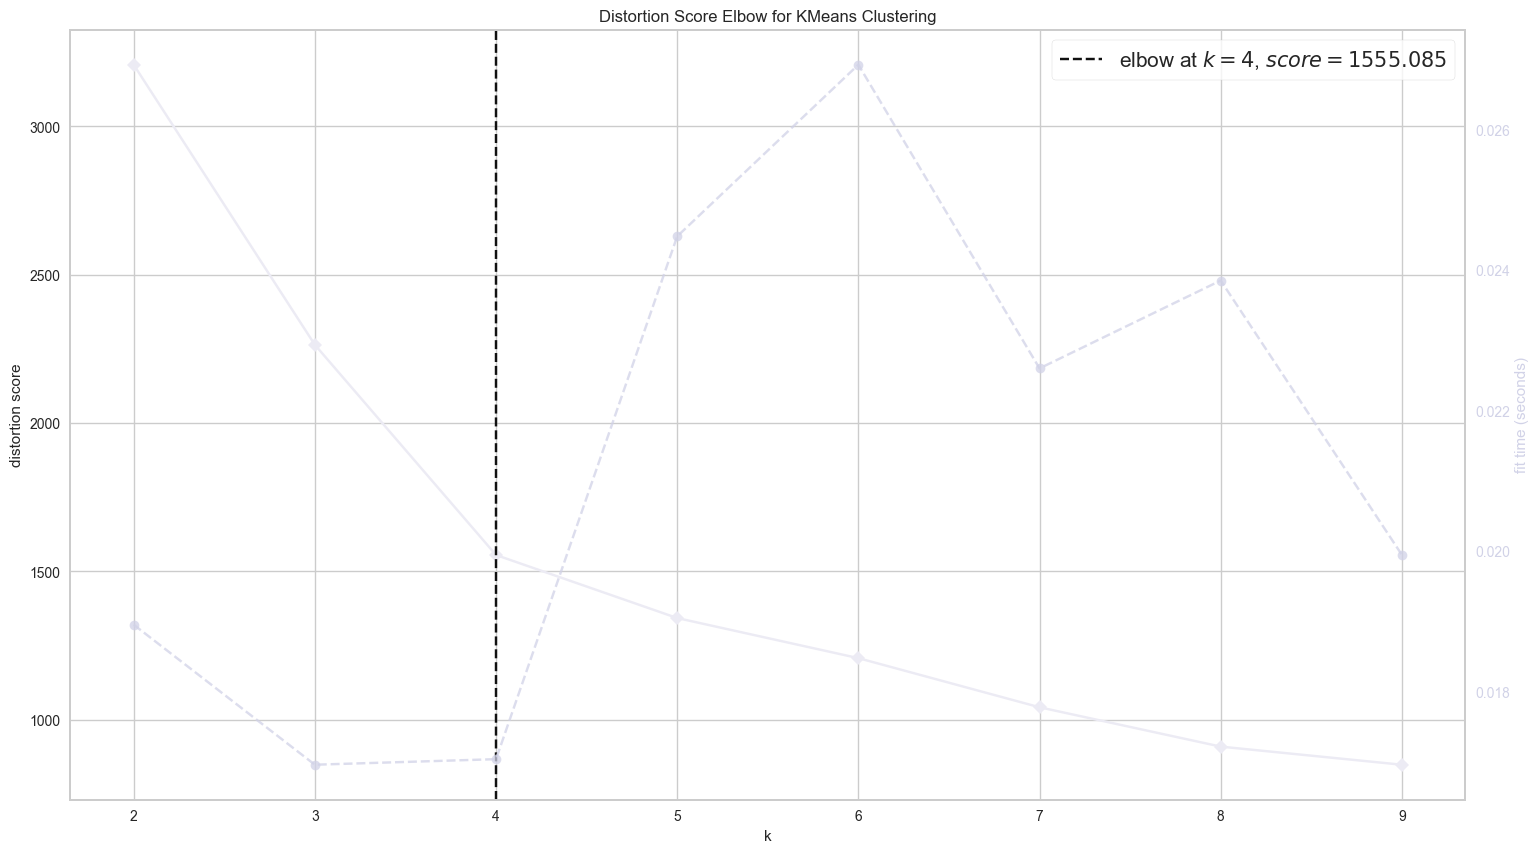

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [107]:
k_means = KMeans(random_state=42)
elbow = KElbowVisualizer(k_means, k=(2, 10))
elbow.fit(rfm_data_transform)
elbow.show()

=> k = 4 as the optimal value.

Try visualize where k = 2 and k = 3

In [108]:
k_2_model = KMeans(n_clusters=2, random_state=42)
k_2_model.fit(rfm_data_transform)
rfm_data['Cluster_KMeans_2'] = k_2_model.labels_
rfm_data.head()

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\4084949188.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,Recency,Frequency,Monetary,Cluster_KMeans,Cluster_Birch,Cluster_Hierarchical,Cluster_Spectral,Cluster_GMM,Cluster_KMeans_2
ID,,,,,,,,,,
1001,1001,37.0,31.0,1105.0,1,2,0,0,1,1
1002,1002,92.0,21.0,738.0,2,0,2,2,2,1
1005,1005,65.0,27.0,1318.0,2,2,2,2,2,1
1006,1006,12.0,7.0,67.0,0,1,3,3,0,0
1007,1007,55.0,33.0,1665.0,2,2,0,2,2,1


In [109]:
rfm_data.groupby('Cluster_KMeans_2').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean',
        'Cluster_KMeans_2':'size'
    }
).round(2)

,Recency,Frequency,Monetary,Cluster_KMeans_2
Cluster_KMeans_2,,,,
0,49.13,7.58,91.36,986
1,48.95,20.77,1025.17,1220


In [110]:
k_3_model = KMeans(n_clusters=3, random_state=42)
k_3_model.fit(rfm_data_transform)
rfm_data['Cluster_KMeans_3'] = k_3_model.labels_
rfm_data.head()

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\790388378.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,Recency,Frequency,Monetary,Cluster_KMeans,Cluster_Birch,Cluster_Hierarchical,Cluster_Spectral,Cluster_GMM,Cluster_KMeans_2,Cluster_KMeans_3
ID,,,,,,,,,,,
1001,1001,37.0,31.0,1105.0,1,2,0,0,1,1,1
1002,1002,92.0,21.0,738.0,2,0,2,2,2,1,2
1005,1005,65.0,27.0,1318.0,2,2,2,2,2,1,2
1006,1006,12.0,7.0,67.0,0,1,3,3,0,0,0
1007,1007,55.0,33.0,1665.0,2,2,0,2,2,1,2


In [111]:
rfm_data.groupby('Cluster_KMeans_3').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean',
        'Cluster_KMeans_3':'size'
    }
).round(2)

,Recency,Frequency,Monetary,Cluster_KMeans_3
Cluster_KMeans_3,,,,
0,48.98,7.29,81.66,934
1,22.87,20.52,984.92,617
2,73.76,20.37,1002.79,655


In [112]:
visualize_3D(rfm_data, 'Cluster_KMeans_2')


In [113]:
visualize_3D(rfm_data, 'Cluster_KMeans_3')


**Our team decide to choose KMeans algorithm (n_cluster = 4) to cluster and analyze.**

In [114]:
combined_data['Cluster'] = rfm_data['Cluster_KMeans']
combined_data.head()

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\3509603605.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Total_Purchase,Living_With,Payment_Method,Phone_num,Age,Monetary,Marriage_status,Number_child,Age_quartile,Cluster
ID,,,,,,,,,,,,,,,,,,,,,
1001,1001,1994.0,Graduation,61074.0,2021-08-17,37.0,790.0,2.0,133.0,0.0,...,31.0,Married_1,Card,84120361225.0,30,1105.0,Married,1,22-33,1
1002,1002,1989.0,Graduation,60093.0,2022-06-26,92.0,503.0,14.0,109.0,16.0,...,21.0,Married_1,Mobile,84948328015.0,35,738.0,Married,1,33-36,2
1005,1005,1978.0,2n Cycle,79689.0,2022-05-12,65.0,312.0,28.0,640.0,180.0,...,27.0,Single_0,Online,84440283305.0,46,1318.0,Single,0,39+,2
1006,1006,1987.0,Master,41021.0,2021-12-30,12.0,15.0,9.0,9.0,6.0,...,7.0,Together_1,Online,84940063568.0,37,67.0,Together,1,36-39,0
1007,1007,1996.0,PhD,57333.0,2021-09-22,55.0,942.0,16.0,397.0,76.0,...,33.0,Divorced_1,Card,84339387894.0,28,1665.0,Divorced,1,22-33,2


Sum `monetary` for each `cluster`

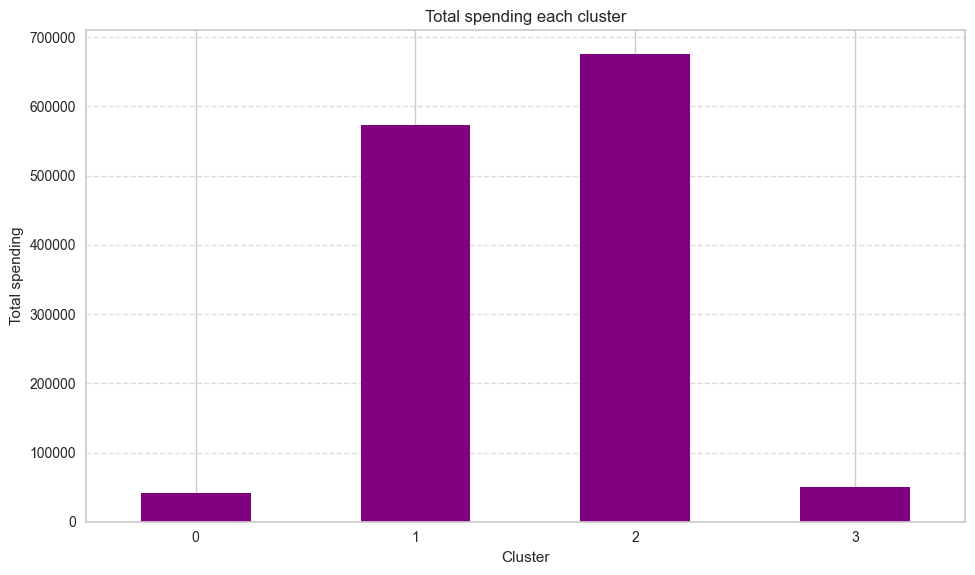

In [115]:
# Sum monetary for each cluster
cluster_totals = combined_data.groupby('Cluster')['Monetary'].sum()

plt.figure(figsize=(10, 6))
cluster_totals.plot(kind='bar', color='purple')
plt.title('Total spending each cluster')
plt.xlabel('Cluster')
plt.ylabel('Total spending')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("Sum_monetary_by_each_cluster.png")
plt.show()

Pie chart - Distribution by `cluster`

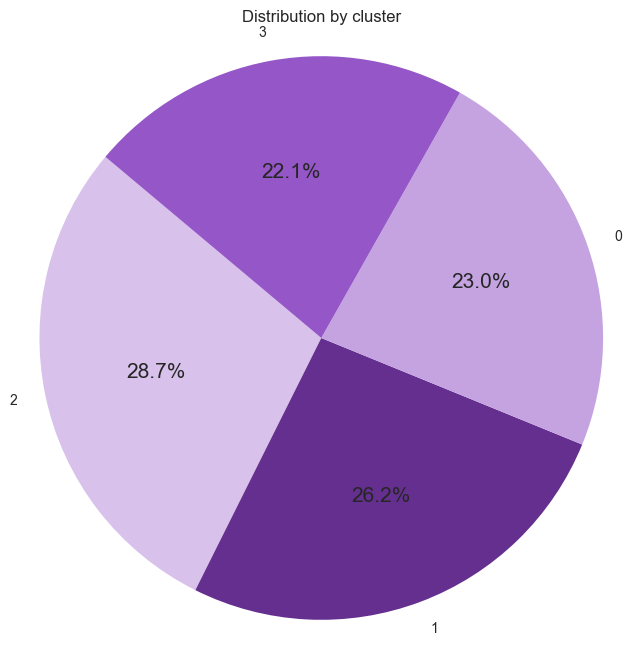

In [116]:
cluster_counts = combined_data['Cluster'].value_counts()
plt.figure(figsize=(8, 8))
colors = ["#d8c1eb","#652f90","#c5a3e1","#9556c8"]
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors = colors)
plt.title('Distribution by cluster')
plt.axis('equal')
plt.show()

Pie chart - Sum of `Monetary percentage` of each `cluster`


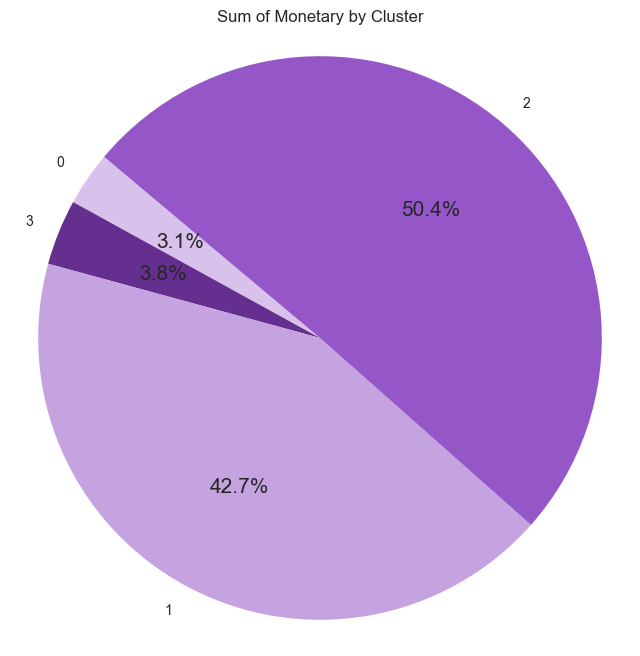

In [117]:
cluster_sum_monetary = combined_data.groupby('Cluster')['Monetary'].sum()
cluster_sum_monetary = cluster_sum_monetary.sort_values()
plt.figure(figsize=(8, 8))

colors = ["#d8c1eb","#652f90","#c5a3e1","#9556c8"]
plt.pie(cluster_sum_monetary, labels=cluster_sum_monetary.index, autopct='%1.1f%%', startangle=140, colors=colors)

plt.title('Sum of Monetary by Cluster')
plt.axis('equal')
plt.show()

Bar chart - mean of `recency` by each `cluster`

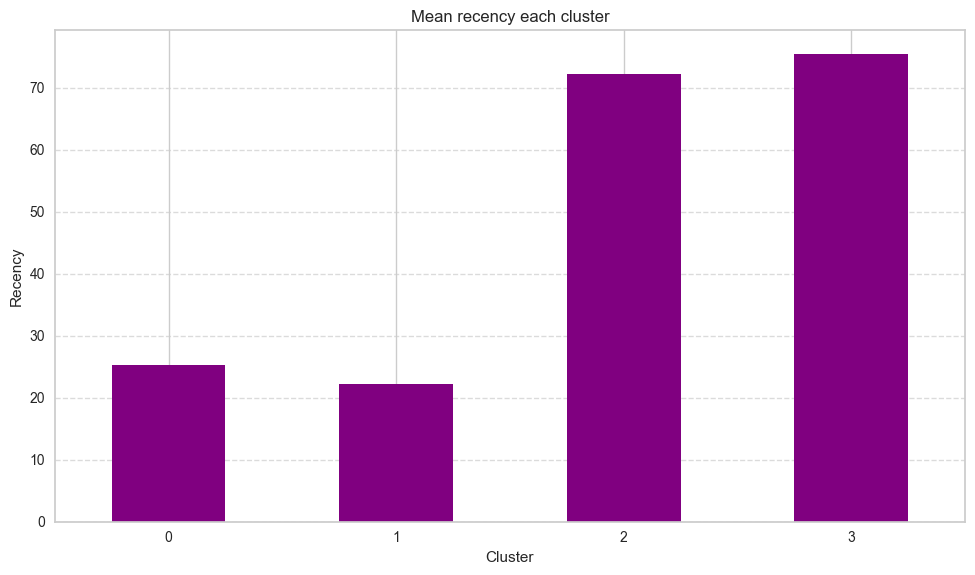

In [118]:
# Mean recency for each cluster
cluster_recency = combined_data.groupby('Cluster')['Recency'].mean()

plt.figure(figsize=(10, 6))
cluster_recency.plot(kind='bar', color='purple')
plt.title('Mean recency each cluster')
plt.xlabel('Cluster')
plt.ylabel('Recency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("Recency_by_each_cluster.png")
plt.show()

In [119]:
rfm_data.groupby('Cluster_KMeans').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean',
        'Cluster_KMeans':'size'
    }
).round(2)

,Recency,Frequency,Monetary,Cluster_KMeans
Cluster_KMeans,,,,
0,25.27,7.23,81.99,507
1,22.22,20.61,990.67,578
2,72.15,20.98,1066.38,634
3,75.49,8.08,103.77,487


In [120]:
top_2_monetary = rfm_data.groupby('Cluster_KMeans')[['Monetary', 'Recency']].mean().nlargest(2, 'Monetary').reset_index()

print(top_2_monetary)

   Cluster_KMeans     Monetary    Recency
0               2  1066.375394  72.152997
1               1   990.667820  22.223183


In [121]:
first_place = top_2_monetary['Cluster_KMeans'][0]
second_place = top_2_monetary['Cluster_KMeans'][1]

print(f"Cluster {first_place} and cluster {second_place} are customers contributing high value to the business.")

Cluster 2 and cluster 1 are customers contributing high value to the business.


In [122]:
best_cluster = top_2_monetary['Cluster_KMeans'][0] if top_2_monetary['Recency'][0] < top_2_monetary['Recency'][1] else top_2_monetary['Cluster_KMeans'][1]
best_cluster_2nd = top_2_monetary['Cluster_KMeans'][0] if top_2_monetary['Recency'][0] > top_2_monetary['Recency'][1] else top_2_monetary['Cluster_KMeans'][1]

print(f"Among the top 2 clusters, cluster {best_cluster} has the best recency value so the cluster {best_cluster} is the best cluster.")
print(f"Cluster {best_cluster_2nd} is the second best cluster.")

Among the top 2 clusters, cluster 1 has the best recency value so the cluster 1 is the best cluster.
Cluster 2 is the second best cluster.


# Customer persona

In [123]:
print(f"Analyze current potential customer from RFM_KMeans - cluster {best_cluster}")

Analyze current potential customer from RFM_KMeans - cluster 1


In [124]:
combined_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2206 entries, 1001 to 9997
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     2206 non-null   int64         
 1   Year_Of_Birth          2206 non-null   float64       
 2   Academic_Level         2206 non-null   category      
 3   Income                 2206 non-null   float64       
 4   Registration_Time      2206 non-null   datetime64[ns]
 5   Recency                2206 non-null   float64       
 6   Liquor                 2206 non-null   float64       
 7   Vegetables             2206 non-null   float64       
 8   Pork                   2206 non-null   float64       
 9   Seafood                2206 non-null   float64       
 10  Candy                  2206 non-null   float64       
 11  Jewellery              2206 non-null   float64       
 12  Num_Deals_Purchases    2206 non-null   float64       
 13  Num_W

In [125]:
cluster_best_data = combined_data[combined_data['Cluster'] == best_cluster]

In [126]:
cluster_best_data

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Total_Purchase,Living_With,Payment_Method,Phone_num,Age,Monetary,Marriage_status,Number_child,Age_quartile,Cluster
ID,,,,,,,,,,,,,,,,,,,,,
1001,1001,1994.0,Graduation,61074.0,2021-08-17,37.0,790.0,2.0,133.0,0.0,...,31.0,Married_1,Card,84120361225.0,30,1105.0,Married,1,22-33,1
1017,1017,1994.0,Graduation,83715.0,2023-02-03,2.0,319.0,10.0,407.0,150.0,...,24.0,Married_0,Mobile,84128100080.0,30,929.0,Married,0,22-33,1
1022,1022,1985.0,Graduation,75693.0,2021-12-06,10.0,798.0,155.0,293.0,72.0,...,22.0,Divorced_0,Online,84957646892.0,39,1445.0,Divorced,0,39+,1
1035,1035,1983.0,PhD,50150.0,2022-06-20,32.0,136.0,48.0,92.0,65.0,...,16.0,Married_0,Mobile,84836306098.0,41,413.0,Married,0,39+,1
1038,1038,1995.0,Graduation,68627.0,2022-01-12,45.0,396.0,17.0,263.0,60.0,...,12.0,Single_0,Card,84146648033.0,29,828.0,Single,0,22-33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951,9951,1988.0,Graduation,53977.0,2022-06-08,21.0,621.0,18.0,165.0,0.0,...,27.0,Together_1,Online,84211846871.0,36,910.0,Together,1,36-39,1
9952,9952,1985.0,PhD,67536.0,2022-05-22,45.0,1254.0,2.0,447.0,23.0,...,30.0,Married_1,Cash,84761419064.0,39,1832.0,Married,1,39+,1
9963,9963,1988.0,Graduation,34600.0,2022-01-01,8.0,200.0,35.0,60.0,8.0,...,17.0,Together_2,Online,84550847285.0,36,321.0,Together,2,36-39,1


Bar chart - Distribution of cluster i (the best cluster) customers by Gender and Age-quartile

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\798618881.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



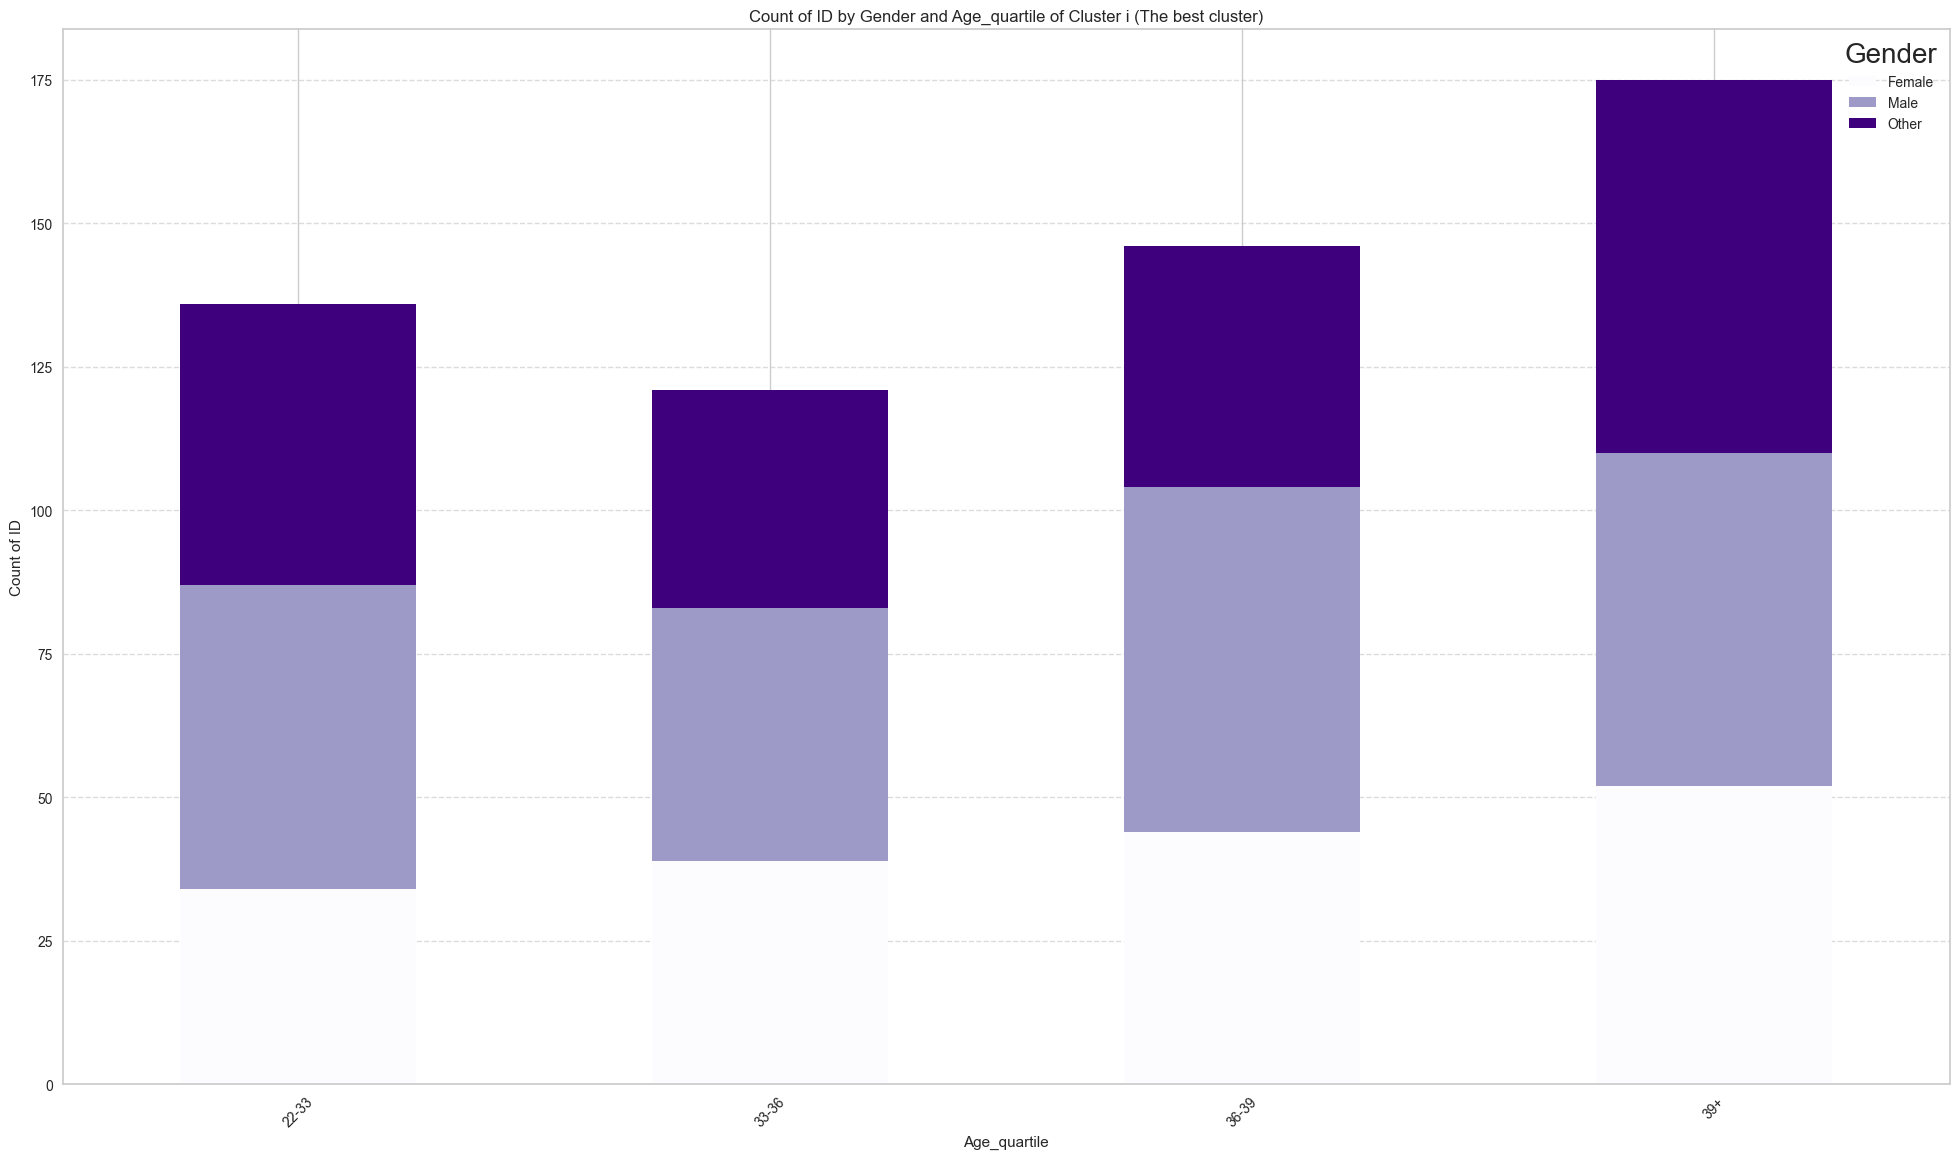

In [127]:
count_data = cluster_best_data.groupby(['Age_quartile', 'Gender']).size().unstack(fill_value=0)
plt.rcParams['font.size'] = 20

cmap = plt.get_cmap('Purples')
colors = cmap(np.linspace(0, 1, count_data.shape[1]))

count_data.plot(kind='bar', stacked=True, figsize=(20, 12), color=colors)

total_counts = count_data.sum(axis=1)
# count_data = count_data.loc[total_counts.sort_values(ascending=False).index]

plt.title('Count of ID by Gender and Age_quartile of Cluster i (The best cluster)')
plt.xlabel('Age_quartile')
plt.ylabel('Count of ID')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('ID_by_Gender_and_Age_quartile_of_the_best_cluster.png')
plt.show()

=> `Gender`: evenly distributed, with males predominating (36.85%); \
`Age`: young middle-aged, aged 36+ accounts for more than 50%

Histogram of `income` distribution

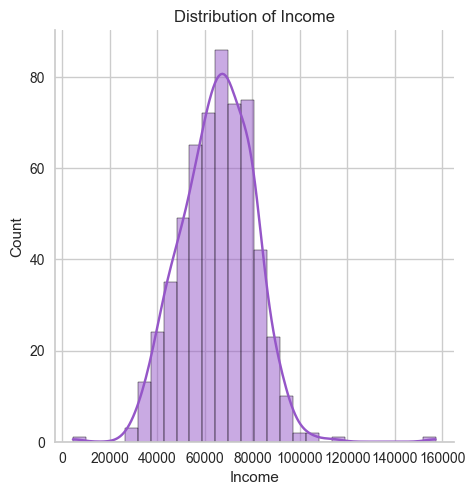

In [128]:
plt.rcParams['figure.figsize'] = (16,10)
plt.rcParams['font.size'] = 15
sns.displot(data=cluster_best_data, x='Income', kde=True, color='#9556c8', bins=28)

plt.title('Distribution of Income')
plt.savefig("income_distribution_cluster_best.png")
plt.show()

=> Income: high, in the range of 50000-100000 USD.

Stacked column chart - distribution of customers by marital status (`Marriage_status`) and number of children (`Number_child`)

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\2368597138.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



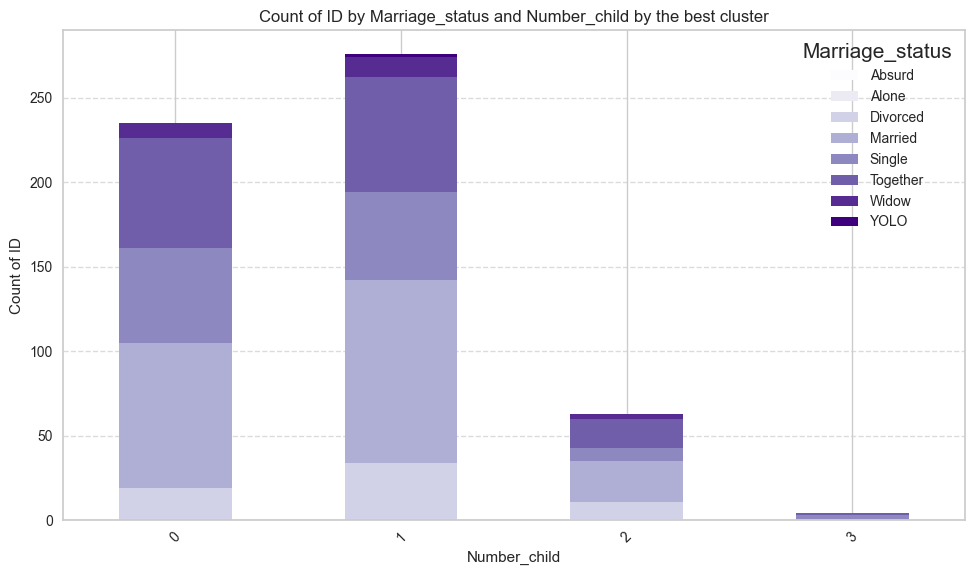

In [129]:
count_data = cluster_best_data.groupby(['Number_child', 'Marriage_status']).size().unstack(fill_value=0)
cmap = plt.get_cmap('Purples')
colors = cmap(np.linspace(0, 1, count_data.shape[1]))
count_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)


total_counts = count_data.sum(axis=1)
count_data = count_data.loc[total_counts.sort_values(ascending=False).index]

plt.title('Count of ID by Marriage_status and Number_child by the best cluster')
plt.xlabel('Number_child')
plt.ylabel('Count of ID')
plt.legend(title='Marriage_status')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('ID_by_Marriage_status_and_Number_child_cluster_i.png')
plt.show()

=> Marital status: married and has less than 1 child.

Pie chart - the distribution of spending on products

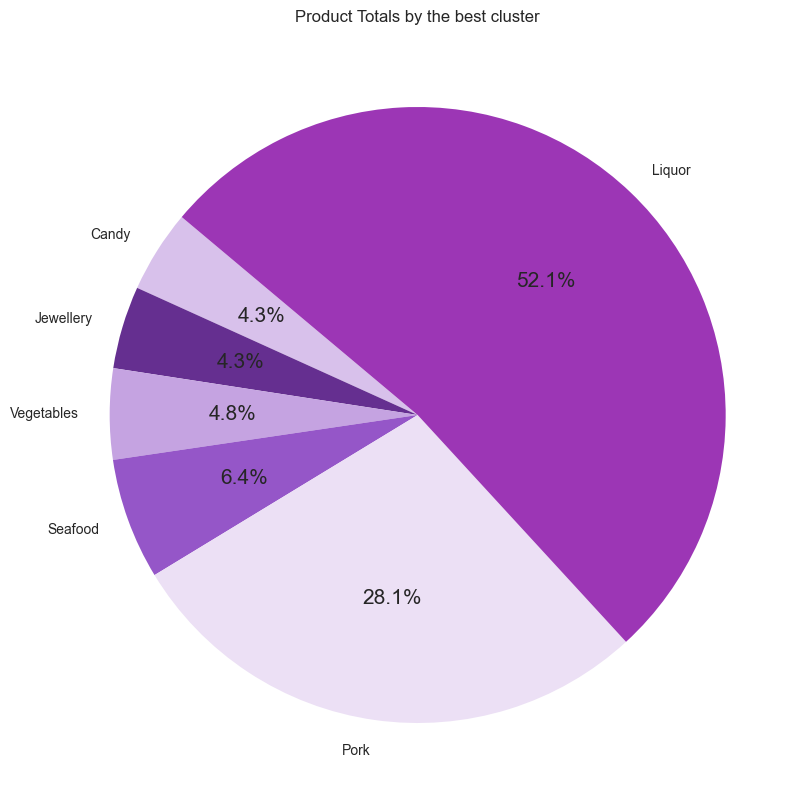

In [130]:
products = pd.DataFrame({
    'Candy': [sum(cluster_best_data['Candy'])],
    'Jewellery': [sum(cluster_best_data['Candy'])],
    'Vegetables': [sum(cluster_best_data['Vegetables'])],
    'Seafood': [sum(cluster_best_data['Seafood'])],
    'Pork': [sum(cluster_best_data['Pork'])],
    'Liquor': [sum(cluster_best_data['Liquor'])]
}, index=['Total'])

columns = products.columns
values = products.values[0]

percentages = values / values.sum()
cmap = plt.get_cmap('Reds')
colors = cmap(percentages)

plt.pie(values, labels=columns, colors = ["#d8c1eb","#652f90","#c5a3e1","#9556c8","#ece0f5", '#9c36b5'], autopct='%1.1f%%', startangle=140)
plt.title("Product Totals by the best cluster")
plt.savefig("products_pie_chart_cluster_best.png")
plt.show()

=> Most spent products: Wine and pork.

Pie chart - Total spending by payment method

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\3191582898.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



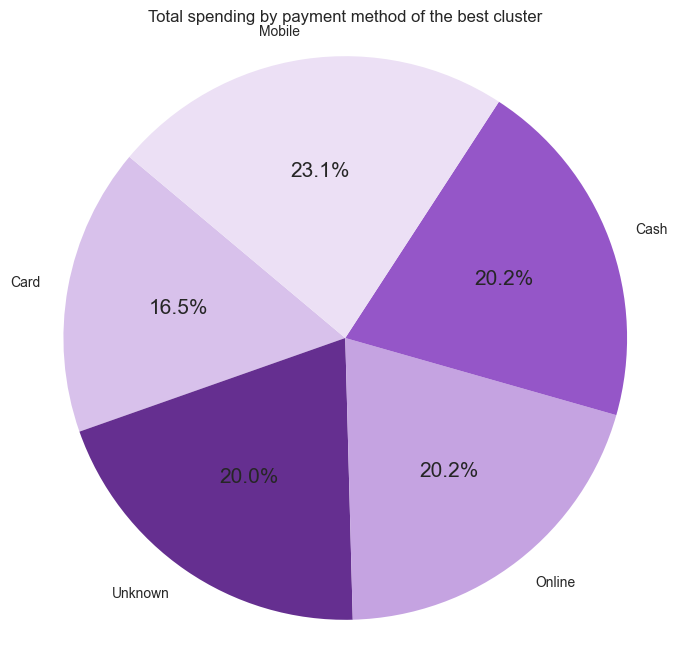

In [131]:
payment_sum_monetary = cluster_best_data.groupby('Payment_Method')['Monetary'].sum()
payment_sum_monetary_sorted = payment_sum_monetary.sort_values()
plt.figure(figsize=(8, 8))
plt.pie(payment_sum_monetary_sorted, labels=payment_sum_monetary_sorted.index, autopct='%1.1f%%', startangle=140, colors = ["#d8c1eb","#652f90","#c5a3e1","#9556c8","#ece0f5"])
plt.title('Total spending by payment method of the best cluster')
plt.axis('equal')
plt.savefig('Total_spending_by_payment_method_cluster_i.png')
plt.show()

Payment method: over 40% use online and mobile

Bar chart - Number of purchases by purchase channel

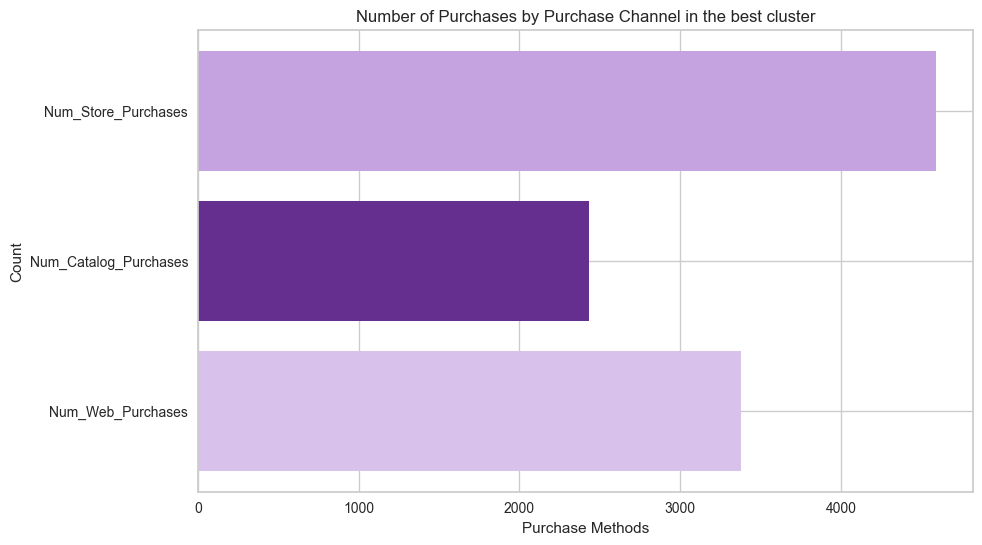

In [132]:
purchase_columns = ['Num_Web_Purchases', 'Num_Catalog_Purchases', 'Num_Store_Purchases']
num_purchase = []
for purchase_method in purchase_columns:
  num_purchase.append(cluster_best_data[purchase_method].sum())

plt.figure(figsize=(10, 6))
plt.barh(purchase_columns, num_purchase, color=["#d8c1eb","#652f90","#c5a3e1"])
plt.xlabel('Purchase Methods')
plt.ylabel('Count')
plt.title('Number of Purchases by Purchase Channel in the best cluster')
plt.savefig('Number_of_Purchases_by_Purchase_Channel_in_the_best_cluster.png')
plt.show()

=> Main shopping channel: direct shopping channel.

Calculate average order value

In [133]:
cluster_best_data['Monetary'].sum() / cluster_best_data['Total_Purchase'].sum()

48.07774979009236

Calculate complaint rate

In [134]:
len(cluster_best_data[cluster_best_data['Complain'] == 1]) / len(cluster_best_data['ID'])


0.005190311418685121

Calculate campaign acceptance rate

In [135]:
print(len(cluster_best_data[cluster_best_data['Promo_10'] == 1]) / len(cluster_best_data['ID']))
print(len(cluster_best_data[cluster_best_data['Promo_20'] == 1]) / len(cluster_best_data['ID']))
print(len(cluster_best_data[cluster_best_data['Promo_30'] == 1]) / len(cluster_best_data['ID']))
print(len(cluster_best_data[cluster_best_data['Promo_40'] == 1]) / len(cluster_best_data['ID']))
print(len(cluster_best_data[cluster_best_data['Promo_50'] == 1]) / len(cluster_best_data['ID']))


0.1245674740484429
0.02249134948096886
0.0847750865051903
0.7076124567474048
0.02249134948096886


Calculate reach rate through the website

In [136]:
1 - len(cluster_best_data[cluster_best_data['Num_Web_Visits_Month'] == 0]) / len(cluster_best_data['ID'])


0.9948096885813149

Calculate purchase with discount rate

In [137]:
1 - len(cluster_best_data[cluster_best_data['Num_Deals_Purchases'] == 0]) / len(cluster_best_data['ID'])


0.9705882352941176

In [138]:
print(f"Analyze current 2nd potential customer from RFM_KMeans - cluster {best_cluster_2nd}")


Analyze current 2nd potential customer from RFM_KMeans - cluster 2


In [139]:
cluster_2nd_best_data = combined_data[combined_data['Cluster'] == best_cluster_2nd]
cluster_2nd_best_data

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Total_Purchase,Living_With,Payment_Method,Phone_num,Age,Monetary,Marriage_status,Number_child,Age_quartile,Cluster
ID,,,,,,,,,,,,,,,,,,,,,
1002,1002,1989.0,Graduation,60093.0,2022-06-26,92.0,503.0,14.0,109.0,16.0,...,21.0,Married_1,Mobile,84948328015.0,35,738.0,Married,1,33-36,2
1005,1005,1978.0,2n Cycle,79689.0,2022-05-12,65.0,312.0,28.0,640.0,180.0,...,27.0,Single_0,Online,84440283305.0,46,1318.0,Single,0,39+,2
1007,1007,1996.0,PhD,57333.0,2021-09-22,55.0,942.0,16.0,397.0,76.0,...,33.0,Divorced_1,Card,84339387894.0,28,1665.0,Divorced,1,22-33,2
1008,1008,1996.0,PhD,75032.0,2022-04-28,74.0,953.0,14.0,180.0,47.0,...,20.0,Married_1,Cash,84518250212.0,28,1218.0,Married,1,22-33,2
1060,1060,1993.0,PhD,70643.0,2021-10-15,66.0,1219.0,109.0,304.0,23.0,...,18.0,Married_0,Card,84255729452.0,31,1831.0,Married,0,22-33,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9943,9943,1996.0,Graduation,69901.0,2022-05-29,95.0,313.0,23.0,206.0,102.0,...,23.0,Divorced_1,Cash,84550192680.0,28,885.0,Divorced,1,22-33,2
9958,9958,1992.0,Graduation,71964.0,2022-05-20,81.0,588.0,53.0,932.0,180.0,...,17.0,Divorced_0,Online,84369222904.0,32,1873.0,Divorced,0,22-33,2
9970,9970,1987.0,Master,59354.0,2022-11-15,53.0,234.0,4.0,53.0,3.0,...,15.0,Divorced_2,Card,84248274979.0,37,313.0,Divorced,2,36-39,2


Bar chart - Distribution of cluster j (the 2nd best cluster) customers by Gender and Age-quartile

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\2136508561.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



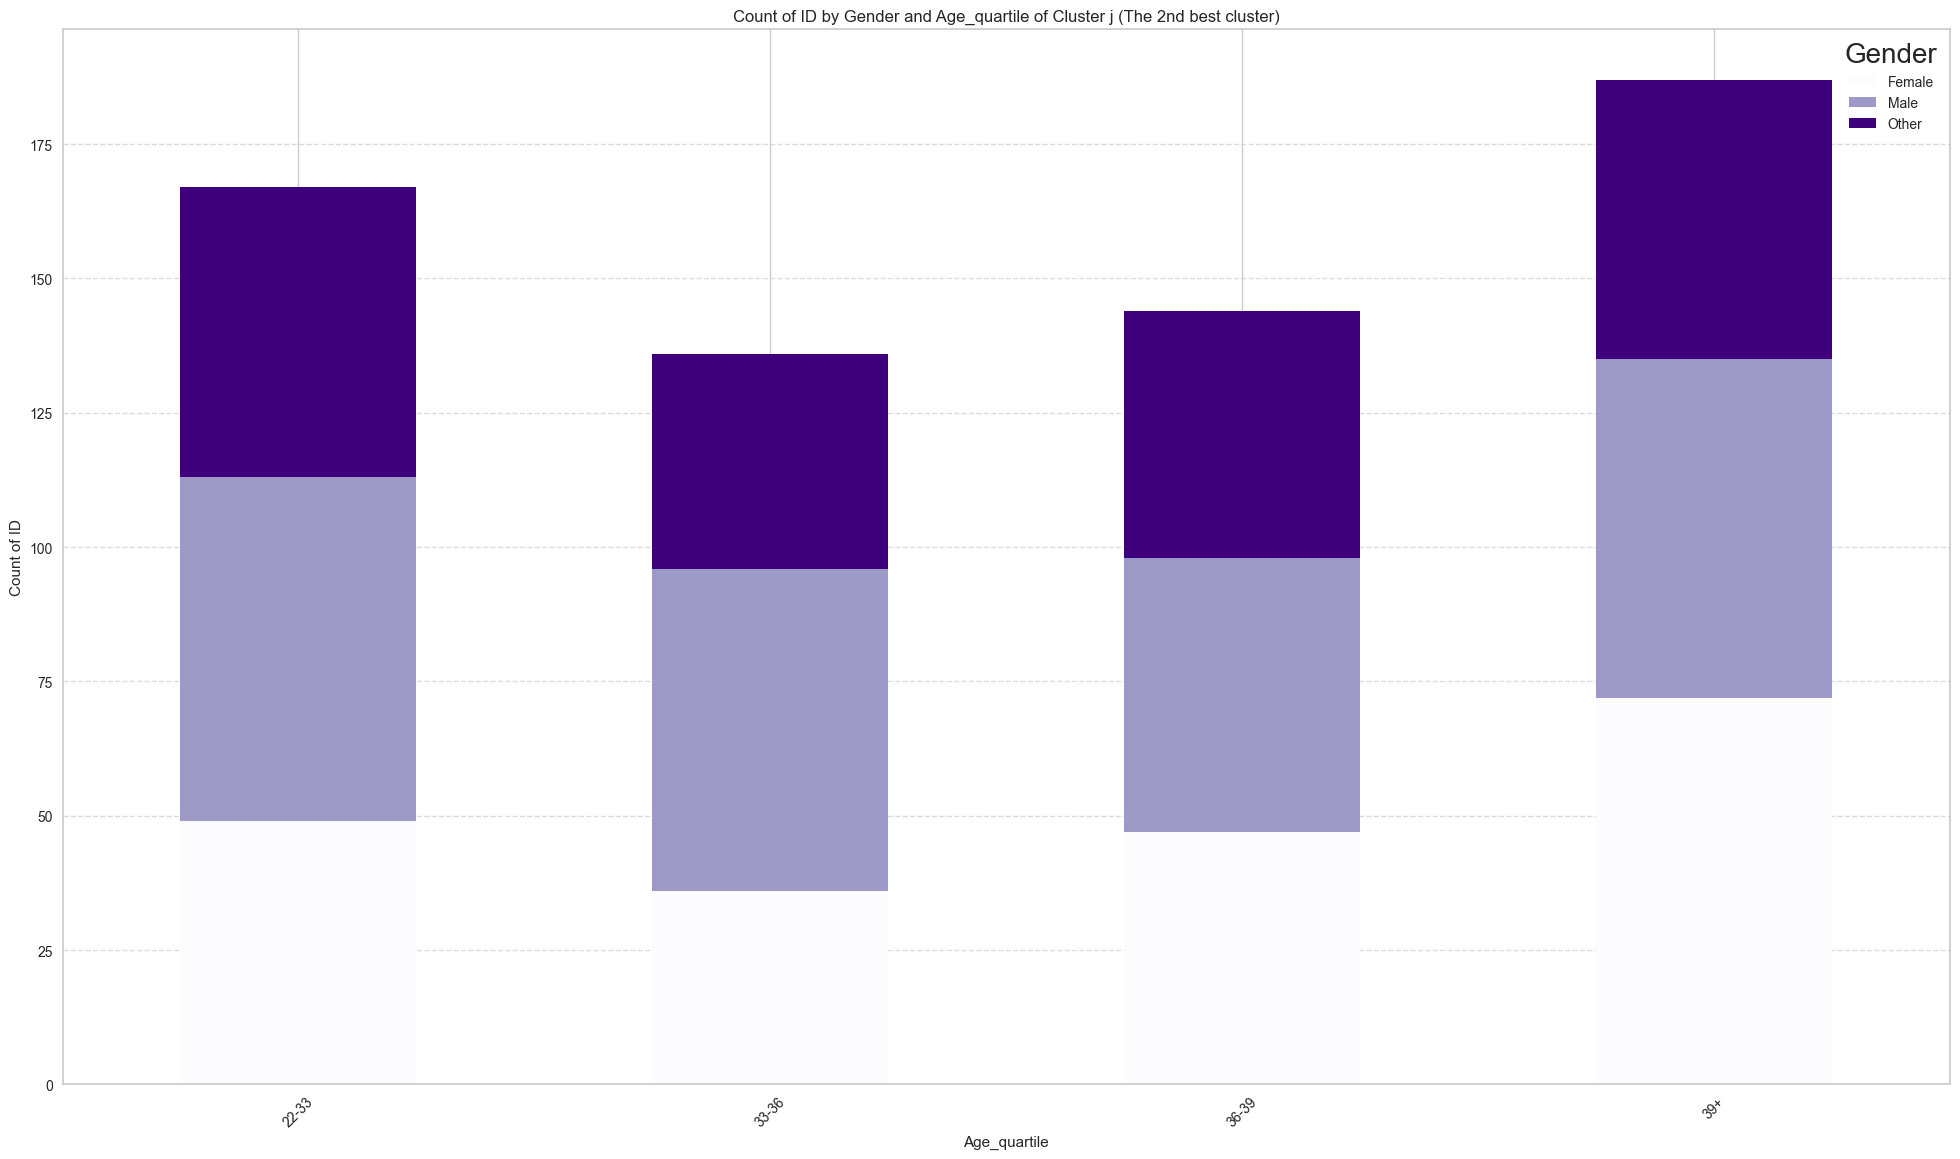

In [140]:
count_data = cluster_2nd_best_data.groupby(['Age_quartile', 'Gender']).size().unstack(fill_value=0)
plt.rcParams['font.size'] = 20

cmap = plt.get_cmap('Purples')
colors = cmap(np.linspace(0, 1, count_data.shape[1]))

count_data.plot(kind='bar', stacked=True, figsize=(20, 12), color=colors)

total_counts = count_data.sum(axis=1)

plt.title('Count of ID by Gender and Age_quartile of Cluster j (The 2nd best cluster)')
plt.xlabel('Age_quartile')
plt.ylabel('Count of ID')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('ID_by_Gender_and_Age_quartile_of_the_2nd_best_cluster.png')
plt.show()

Histogram of `income` distribution

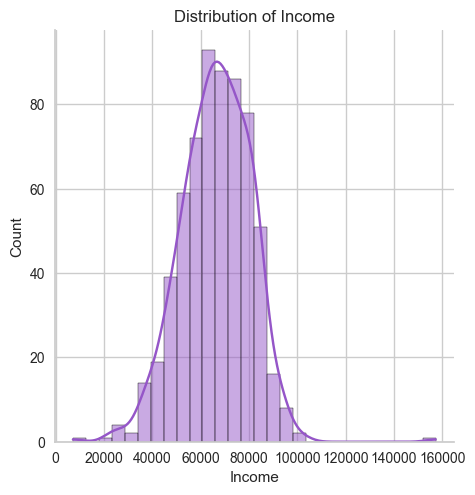

In [141]:
plt.rcParams['figure.figsize'] = (16,10)
plt.rcParams['font.size'] = 15
sns.displot(data=cluster_2nd_best_data, x='Income', kde=True, color='#9556c8', bins=28)

plt.title('Distribution of Income')
plt.savefig("income_distribution_2nd_cluster_best.png")
plt.show()

C:\Users\HS\AppData\Local\Temp\ipykernel_22316\2324846012.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



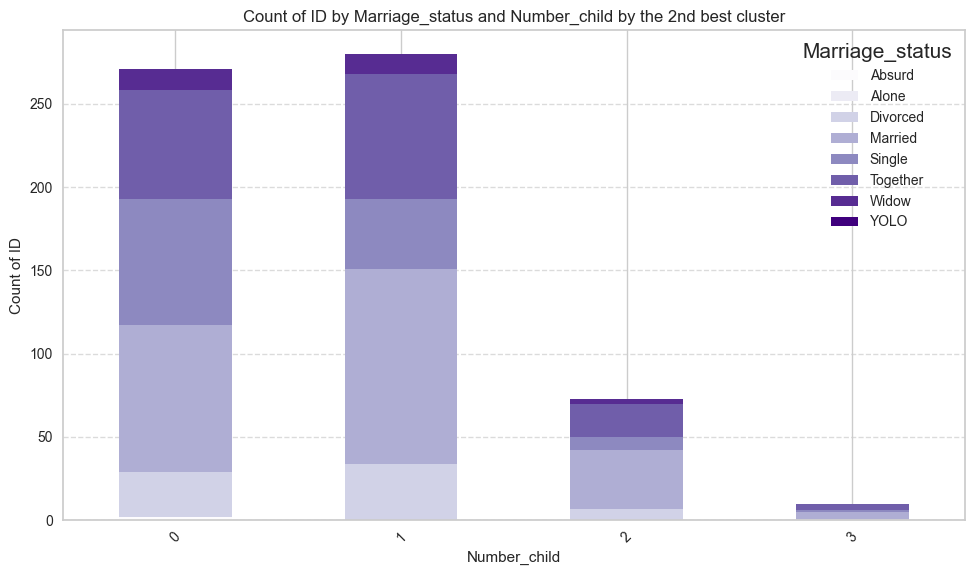

In [142]:
count_data = cluster_2nd_best_data.groupby(['Number_child', 'Marriage_status']).size().unstack(fill_value=0)
cmap = plt.get_cmap('Purples')
colors = cmap(np.linspace(0, 1, count_data.shape[1]))
count_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)


total_counts = count_data.sum(axis=1)
count_data = count_data.loc[total_counts.sort_values(ascending=False).index]

plt.title('Count of ID by Marriage_status and Number_child by the 2nd best cluster')
plt.xlabel('Number_child')
plt.ylabel('Count of ID')
plt.legend(title='Marriage_status')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('ID_by_Marriage_status_and_Number_child_cluster_j.png')
plt.show()

=> Marital status: married and has less than 1 child.

Pie chart - the distribution of spending on products

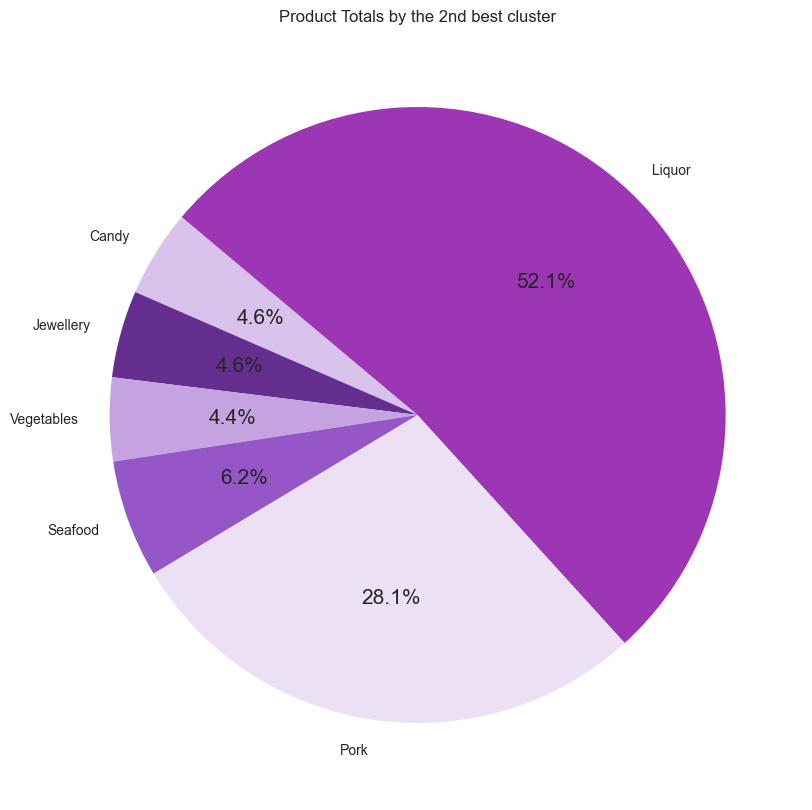

In [143]:
products = pd.DataFrame({
    'Candy': [sum(cluster_2nd_best_data['Candy'])],
    'Jewellery': [sum(cluster_2nd_best_data['Candy'])],
    'Vegetables': [sum(cluster_2nd_best_data['Vegetables'])],
    'Seafood': [sum(cluster_2nd_best_data['Seafood'])],
    'Pork': [sum(cluster_2nd_best_data['Pork'])],
    'Liquor': [sum(cluster_2nd_best_data['Liquor'])]
}, index=['Total'])

columns = products.columns
values = products.values[0]

percentages = values / values.sum()
cmap = plt.get_cmap('Reds')
colors = cmap(percentages)

plt.pie(values, labels=columns, colors = ["#d8c1eb","#652f90","#c5a3e1","#9556c8","#ece0f5", '#9c36b5'], autopct='%1.1f%%', startangle=140)
plt.title("Product Totals by the 2nd best cluster")
plt.savefig("products_pie_chart_cluster_2nd_best.png")
plt.show()

=> Most spent products: Wine and pork.


C:\Users\HS\AppData\Local\Temp\ipykernel_22316\2991473537.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



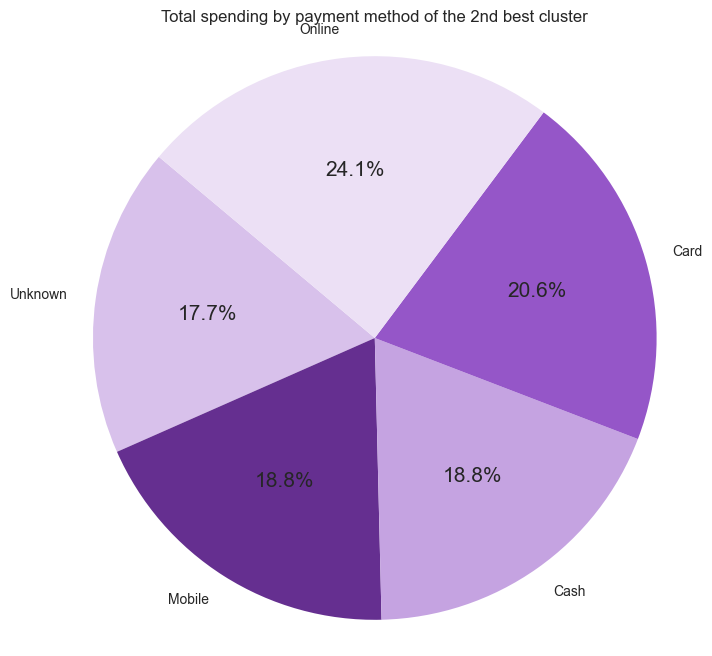

In [144]:
payment_sum_monetary = cluster_2nd_best_data.groupby('Payment_Method')['Monetary'].sum()
payment_sum_monetary_sorted = payment_sum_monetary.sort_values()
plt.figure(figsize=(8, 8))
plt.pie(payment_sum_monetary_sorted, labels=payment_sum_monetary_sorted.index, autopct='%1.1f%%', startangle=140, colors = ["#d8c1eb","#652f90","#c5a3e1","#9556c8","#ece0f5"])
plt.title('Total spending by payment method of the 2nd best cluster')
plt.axis('equal')
plt.savefig('Total_spending_by_payment_method_cluster_3.png')
plt.show()

Payment method: over 40% use online and mobile


Bar chart - Number of purchases by purchase channel


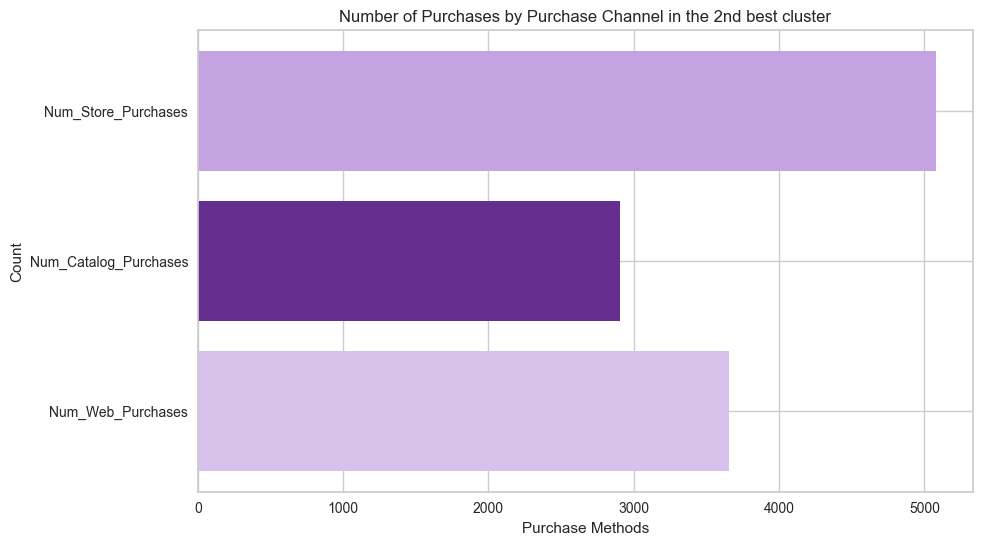

In [145]:
purchase_columns = ['Num_Web_Purchases', 'Num_Catalog_Purchases', 'Num_Store_Purchases']
num_purchase = []
for purchase_method in purchase_columns:
  num_purchase.append(cluster_2nd_best_data[purchase_method].sum())

plt.figure(figsize=(10, 6))
plt.barh(purchase_columns, num_purchase, color=["#d8c1eb","#652f90","#c5a3e1"])
plt.xlabel('Purchase Methods')
plt.ylabel('Count')
plt.title('Number of Purchases by Purchase Channel in the 2nd best cluster')
plt.savefig('Number_of_Purchases_by_Purchase_Channel_in_the_2nd_best_cluster.png')
plt.show()

=> Main shopping channel: direct shopping channel.

Calculate average order value

In [146]:
cluster_2nd_best_data['Monetary'].sum() / cluster_2nd_best_data['Total_Purchase'].sum()


50.837055417700576

Calculate complaint rate

In [147]:
len(cluster_2nd_best_data[cluster_2nd_best_data['Complain'] == 1]) / len(cluster_2nd_best_data['ID'])


0.00946372239747634

Calculate campaign acceptance rate

In [148]:
print(len(cluster_2nd_best_data[cluster_2nd_best_data['Promo_10'] == 1]) / len(cluster_2nd_best_data['ID']))
print(len(cluster_2nd_best_data[cluster_2nd_best_data['Promo_20'] == 1]) / len(cluster_2nd_best_data['ID']))
print(len(cluster_2nd_best_data[cluster_2nd_best_data['Promo_30'] == 1]) / len(cluster_2nd_best_data['ID']))
print(len(cluster_2nd_best_data[cluster_2nd_best_data['Promo_40'] == 1]) / len(cluster_2nd_best_data['ID']))
print(len(cluster_2nd_best_data[cluster_2nd_best_data['Promo_50'] == 1]) / len(cluster_2nd_best_data['ID']))


0.10725552050473186
0.02365930599369085
0.0694006309148265
0.7003154574132492
0.02365930599369085


Calculate reach rate through the website

In [149]:
1 - len(cluster_2nd_best_data[cluster_2nd_best_data['Num_Web_Visits_Month'] == 0]) / len(cluster_2nd_best_data['ID'])


0.9936908517350158

Calculate purchase with discount rate

In [150]:
1 - len(cluster_2nd_best_data[cluster_2nd_best_data['Num_Deals_Purchases'] == 0]) / len(cluster_2nd_best_data['ID'])


0.9716088328075709